<a href="https://colab.research.google.com/github/Songnahyun/Project/blob/main/cp1_project(Stockx_dataset)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To Do List Memo

* 신발 이름 split -> 인코딩 -> 머신러닝 모델 학습
* 다른 머신러닝 모델들 적용
* Test데이터 혹은 Kream 크롤링 데이터의 트랜드 분석

[수행된 사항]
- 2017-2019년 Stockx 신발 트랜드 분석 
- 모델 학습을 위한 train/test 데이터 전처리
- 베이스라인 모델 예측 수행

[수행될 사항]
- 발표 혹은 보고서에 담을 트랜드 분석 추가 시행 (Test데이터, Kream크롤링 데이터 포함)
- 추가적인 Feature Engineering으로 모델 성능 향상 (신발 이름 컬럼 공백기준 Split 등)
- 다른 모델 역할 분담해서 사용 및 근거정리

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [23]:
# 한글,마이너스 폰트 깨짐 해결
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)
warnings.filterwarnings("ignore")
%matplotlib inline

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
train = pd.read_csv("/content/drive/MyDrive/CP1_project/StockX-Data-Contest-2019-3.csv")
test = pd.read_csv("/content/drive/MyDrive/CP1_project/sneakers.csv")

print(train.shape)
print(test.shape)

(99956, 8)
(1000, 17)


In [26]:
df = train.copy()
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


In [27]:
test

,Unnamed: 0,item,brand,retail,release,lowestAsk,numberOfAsks,salesThisPeriod,highestBid,numberOfBids,annualHigh,annualLow,volatility,deadstockSold,averageDeadstockPrice,lastSale,changePercentage
0,0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,159,3560,2615,226,1193,833,138,0.092028,8904,188,184,0.051429
1,1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,186,1149,478,220,567,343,137,0.054394,1146,209,190,-0.024050
2,2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,255,1284,345,300,547,2043,216,0.032678,938,333,260,-0.018868
3,3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,310,530,176,725,1141,2199,100,0.406753,827,566,320,-0.389280
4,4,adidas Yeezy Boost 700 Hi-Res Red,adidas,300,2022-06-17,340,312,111,341,155,449,295,0.024200,112,354,350,0.008646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Nike Air Force 1 Low G-Dragon Peaceminusone Pa...,Nike,200,2020-11-25,199,429,12,544,206,742,180,0.148060,2650,448,560,0.056604
996,996,Jordan 1 Retro High Black Satin Gym Red,Jordan,170,2020-01-18,139,338,12,250,167,385,100,0.075806,2467,190,158,0.097222
997,997,Nike Air Max 90 Recraft Triple White,Nike,120,2020-01-09,97,181,12,101,92,217,43,0.138965,2407,123,102,-0.150000
998,998,adidas Yeezy Boost 350 V2 Fade,adidas,220,2020-11-11,235,198,12,375,102,600,119,0.174957,2383,304,250,-0.283668


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [29]:
df.describe()

,Shoe Size
count,99956.000000
mean,9.344181
std,2.329588
min,3.500000
25%,8.000000
50%,9.500000
75%,11.000000
max,17.000000


# Data Cleaning

## 텍스트 전처리

In [30]:
# 신발 이름에서 - 제거

df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-',' '))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,$828,$220,2/11/17,11.0,Rhode Island


In [31]:

# Price 에서 [$ ,] 제거

df['Sale Price'] = df['Sale Price'].apply(lambda x : x.replace('$',''))
df['Sale Price'] = df['Sale Price'].apply(lambda x : x.replace(',',''))

df['Retail Price'] = df['Retail Price'].apply(lambda x : x.replace('$',''))
df['Retail Price'] = df['Retail Price'].apply(lambda x : x.replace(',',''))

df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2/11/17,11.0,Rhode Island


## 데이터 타입 변경

In [32]:
df.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

In [33]:
# 주문 일자, Release Date

df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%y')
df['Release Date'] = pd.to_datetime(df['Release Date'],format='%m/%d/%y')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


In [34]:
# 판매가, 소매가 object -> numerical 데이터 타입 변경

target_col = ['Sale Price','Retail Price']

for col in target_col:
  df[col] = pd.to_numeric(df[col])

print(df.dtypes)
df.head()

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price               int64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


# Feature Engineering
* 추후에 달러와 인치 변환?

## 1. 판매가와 소매가 비교 컬럼 생성

In [35]:
df['Cheaper Buy'] = df['Sale Price'] < df['Retail Price']
df['Same Buy'] = df['Sale Price'] == df['Retail Price']
df['Expensive Buy'] = df['Sale Price'] > df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True


## 2. 상품 출시일과 판매된 날짜(주문일) 차이 컬럼 생성

In [36]:
df['time gap'] = df['Order Date']-df['Release Date']
df['time gap'] = df['time gap'].apply(lambda x: str(x).split(' ')[0])
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True,342
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True,282
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202


## 3. 미국 도시 -> 큰 범주로 분류 컬럼

In [37]:
df['Buyer Region'].unique()

array(['California', 'Kentucky', 'Rhode Island', 'Michigan', 'New York',
       'Kansas', 'Florida', 'New Jersey', 'Texas', 'North Carolina',
       'Oregon', 'Alabama', 'Delaware', 'Virginia', 'Wisconsin',
       'Colorado', 'Massachusetts', 'Pennsylvania', 'Louisiana',
       'Washington', 'Georgia', 'Ohio', 'Nebraska', 'Oklahoma',
       'Connecticut', 'Missouri', 'South Carolina', 'Maine', 'Illinois',
       'Nevada', 'Maryland', 'Arizona', 'Minnesota', 'Iowa', 'Tennessee',
       'West Virginia', 'Indiana', 'Arkansas', 'Alaska', 'Wyoming',
       'Utah', 'New Hampshire', 'Vermont', 'District of Columbia',
       'Hawaii', 'New Mexico', 'South Dakota', 'Mississippi',
       'North Dakota', 'Idaho', 'Montana'], dtype=object)

In [38]:
East = ['Kentucky','Rhode Island','Michigan','New York','New Jersey','North Carolina'
          ,'Delaware','Virginia','Massachusetts','Pennsylvania','Ohio','Connecticut','Maine','Illinois'
          ,'Maryland','Tennessee','West Virginia','Indiana','New Hampshire','Vermont',]
West = ['California','Oregon','Washington','Nevada','Arizona','Wyoming','Utah','District of Columbia','Idaho']
South = ['Texas','Alabama','Florida','Louisiana','Georgia','Oklahoma','South Carolina','Arkansas','New Mexico'
          ,'Mississippi']
North = ['Wisconsin','Minnesota','North Dakota','Montana']
central = ['Kansas','Colorado','Nebraska','Missouri','Iowa','South Dakota']
etc = ['Alaska','Hawaii']

In [39]:
df['cardinal point'] = [None] * len(df)

for i in range(len(df)):
  if df['Buyer Region'][i] in East:
    df['cardinal point'][i] = 'East'
  elif df['Buyer Region'][i] in West:
    df['cardinal point'][i] = 'West'
  elif df['Buyer Region'][i] in South:
    df['cardinal point'][i] = 'South'
  elif df['Buyer Region'][i] in North:
    df['cardinal point'][i] = 'North'
  elif df['Buyer Region'][i] in central:
    df['cardinal point'][i] = 'Central'
  elif df['Buyer Region'][i] in etc:
    df['cardinal point'][i] = 'etc'
  else:
    df['cardinal point'][i] = 'error'  

In [40]:
df['cardinal point'].value_counts()

East       46530
West       31949
South      16641
Central     2714
North       1678
etc          444
Name: cardinal point, dtype: int64

##4. 브랜드명 변경

In [41]:
df['Brand'].value_counts()

 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64

In [42]:
def change_brand(values):
  if values == 'Off-White':
    return 'Nike'
  else:
    return 'Adidas'

df['Brand'] = df['Brand'].apply(change_brand)

In [43]:
df_jordan = df[df['Sneaker Name'].str.contains('Jordan')]
df_jordan['Brand'] = df_jordan['Brand'].replace('Nike', 'Jordan')
jordan_index = df_jordan.index
df.drop(jordan_index, inplace = True)
df = pd.concat([df, df_jordan], ignore_index=True)
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point
0,2017-09-01,Adidas,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True,342,West
1,2017-09-01,Adidas,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West
2,2017-09-01,Adidas,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282,West
3,2017-09-01,Adidas,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True,282,East
4,2017-09-01,Adidas,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Jordan,Air Jordan 1 Retro High Off White Chicago,2550,190,2017-09-09,11.0,Oregon,False,False,True,522,West
99952,2019-02-13,Jordan,Air Jordan 1 Retro High Off White University Blue,1000,190,2018-06-23,10.0,California,False,False,True,235,West
99953,2019-02-13,Jordan,Air Jordan 1 Retro High Off White University Blue,720,190,2018-06-23,14.0,Oregon,False,False,True,235,West
99954,2019-02-13,Jordan,Air Jordan 1 Retro High Off White University Blue,829,190,2018-06-23,6.0,Tennessee,False,False,True,235,East


In [44]:
df['Brand'].value_counts()

Adidas    72162
Nike      22091
Jordan     5703
Name: Brand, dtype: int64

##5. 상품명 자르기

In [45]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point'],
      dtype='object')

In [46]:
df['Name1'] = df['Sneaker Name'].str.split(' ').str[0]
df['Name2'] = df['Sneaker Name'].str.split(' ').str[1]
df['Name3'] = df['Sneaker Name'].str.split(' ').str[2]
df['Sneaker Name'] = df['Name1'] + str(' ') + df['Name2'] + str(' ') + df['Name3']
df['Sneaker Name']

0        Adidas Yeezy Boost
1        Adidas Yeezy Boost
2        Adidas Yeezy Boost
3        Adidas Yeezy Boost
4        Adidas Yeezy Boost
                ...        
99951          Air Jordan 1
99952          Air Jordan 1
99953          Air Jordan 1
99954          Air Jordan 1
99955          Air Jordan 1
Name: Sneaker Name, Length: 99956, dtype: object

In [47]:
df[['Sneaker Name']]

,Sneaker Name
0,Adidas Yeezy Boost
1,Adidas Yeezy Boost
2,Adidas Yeezy Boost
3,Adidas Yeezy Boost
4,Adidas Yeezy Boost
...,...
99951,Air Jordan 1
99952,Air Jordan 1
99953,Air Jordan 1
99954,Air Jordan 1


In [48]:
df['Sneaker Name'] = df['Sneaker Name'].str.replace('adidas', 'Adidas')

In [49]:
df['Sneaker Name'].value_counts()

Adidas Yeezy Boost      72162
Air Jordan 1             5703
Nike Air Presto          4363
Nike Zoom Fly            4317
Nike Blazer Mid          3622
Nike Air VaporMax        3429
Nike Air Max             3390
Nike Air Force           2486
Nike React Hyperdunk      484
Name: Sneaker Name, dtype: int64

In [50]:
df.drop(columns = ['Name1', 'Name2', 'Name3'], inplace = True)
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point'],
      dtype='object')

## 출시가 대비 몇배의 차익을 발생시켰는지

In [51]:
df['multiple_return'] = (df['Sale Price']/df['Retail Price'])
df['multiple_return'] = df['multiple_return'].round(1)

## 이상치 처리

In [52]:
# 판매가 1000초과 이상치 처리
df.drop(df.loc[df['Sale Price']>1000].index, inplace=True)
df = df.reset_index(drop = True)
# time gap 800초과 이상치 처리
df['time gap'] = df['time gap'].astype('int')
df.drop(df.loc[df['time gap']<0].index, inplace=True)
df.drop(df.loc[df['time gap']>800].index, inplace=True)
df = df.reset_index(drop = True)

df.shape

(91589, 14)

In [53]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return
0,2017-09-01,Adidas,Adidas Yeezy Boost,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.1
1,2017-09-01,Adidas,Adidas Yeezy Boost,690,220,2016-11-23,11.0,California,False,False,True,282,West,3.1
2,2017-09-01,Adidas,Adidas Yeezy Boost,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202,East,3.8
3,2017-09-01,Adidas,Adidas Yeezy Boost,798,220,2017-02-11,8.5,Michigan,False,False,True,202,East,3.6
4,2017-09-01,Adidas,Adidas Yeezy Boost,784,220,2016-12-17,11.0,California,False,False,True,258,West,3.6


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


                 Sale Price  Retail Price  Shoe Size  Cheaper Buy  Same Buy  \
Sale Price         1.000000     -0.375816   0.083474    -0.089782 -0.065913   
Retail Price      -0.375816      1.000000  -0.050994     0.031974  0.024580   
Shoe Size          0.083474     -0.050994   1.000000    -0.002399 -0.000295   
Cheaper Buy       -0.089782      0.031974  -0.002399     1.000000 -0.004704   
Same Buy          -0.065913      0.024580  -0.000295    -0.004704  1.000000   
Expensive Buy      0.111603     -0.040422   0.002085    -0.791001 -0.608087   
time gap          -0.146276      0.254138   0.020739     0.051186  0.054131   
multiple_return    0.927831     -0.674969   0.081102    -0.076604 -0.057478   

                 Expensive Buy  time gap  multiple_return  
Sale Price            0.111603 -0.146276         0.927831  
Retail Price         -0.040422  0.254138        -0.674969  
Shoe Size             0.002085  0.020739         0.081102  
Cheaper Buy          -0.791001  0.051186        

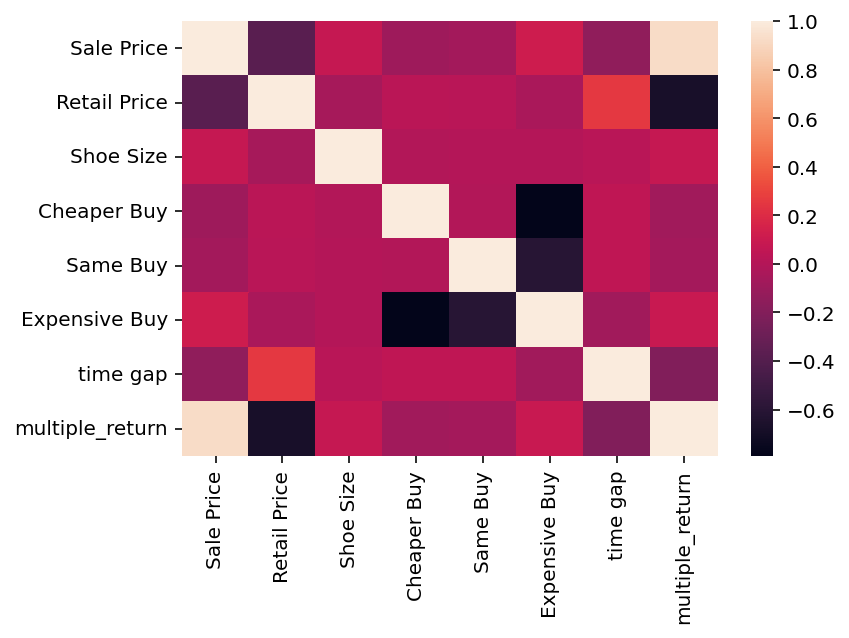

In [54]:
correlations = df.corr()
print(correlations)
sns.heatmap(correlations)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


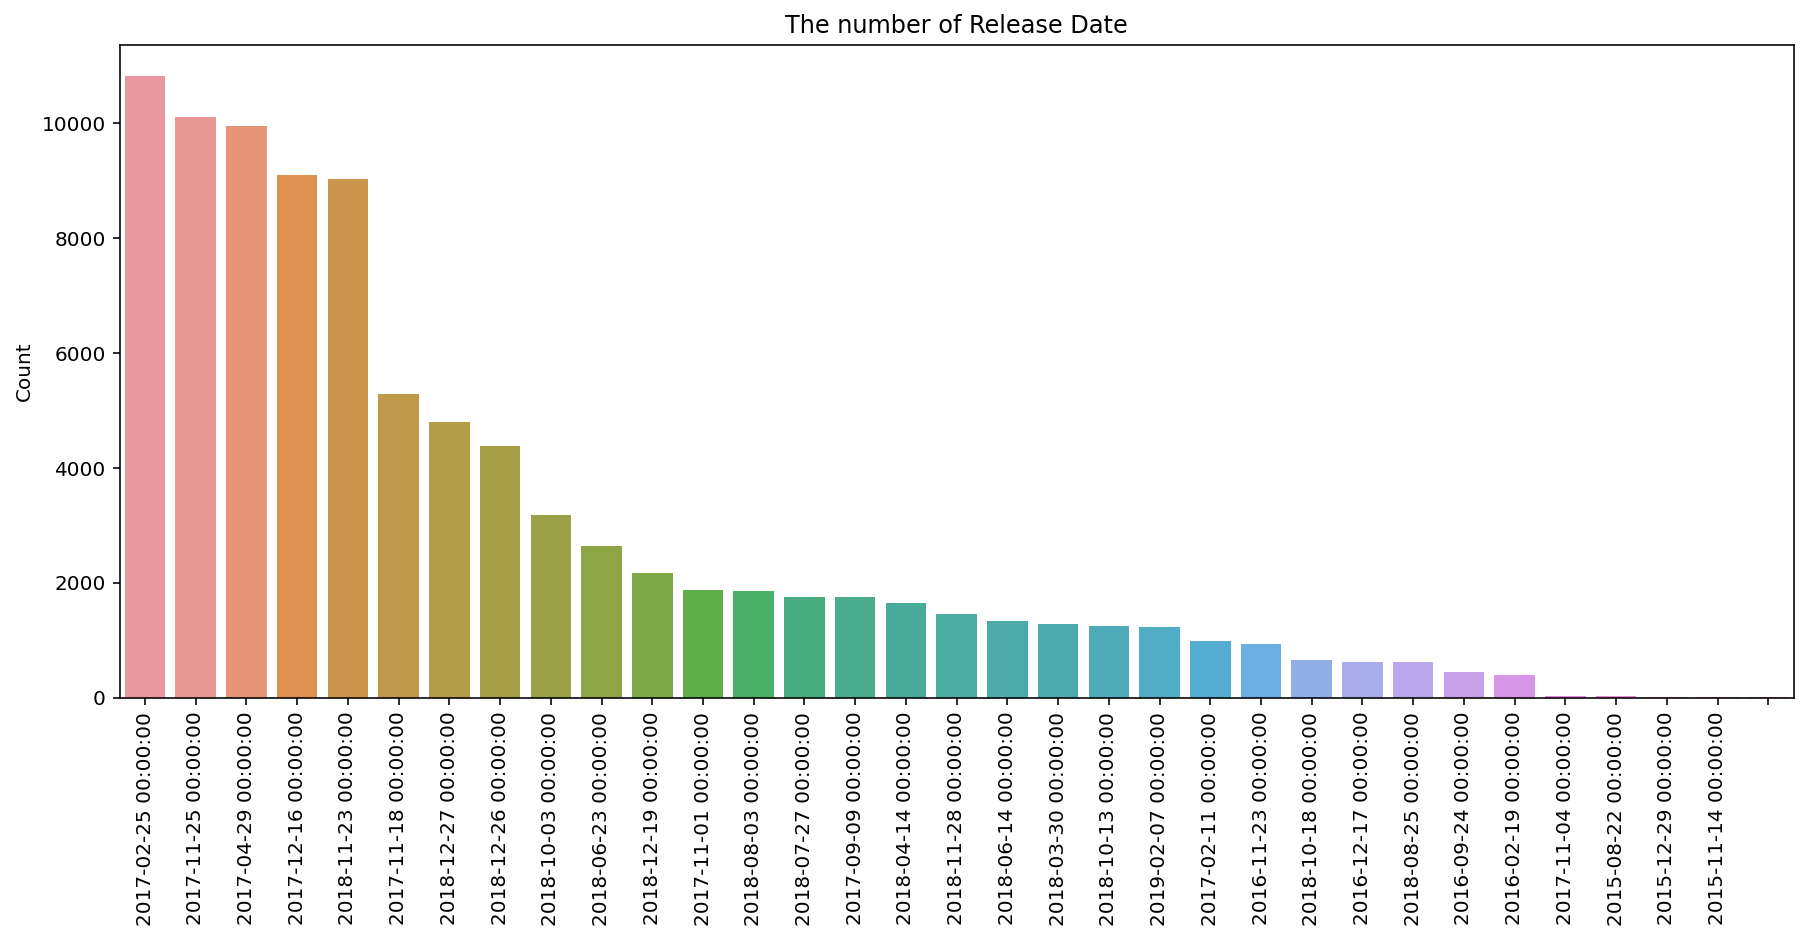

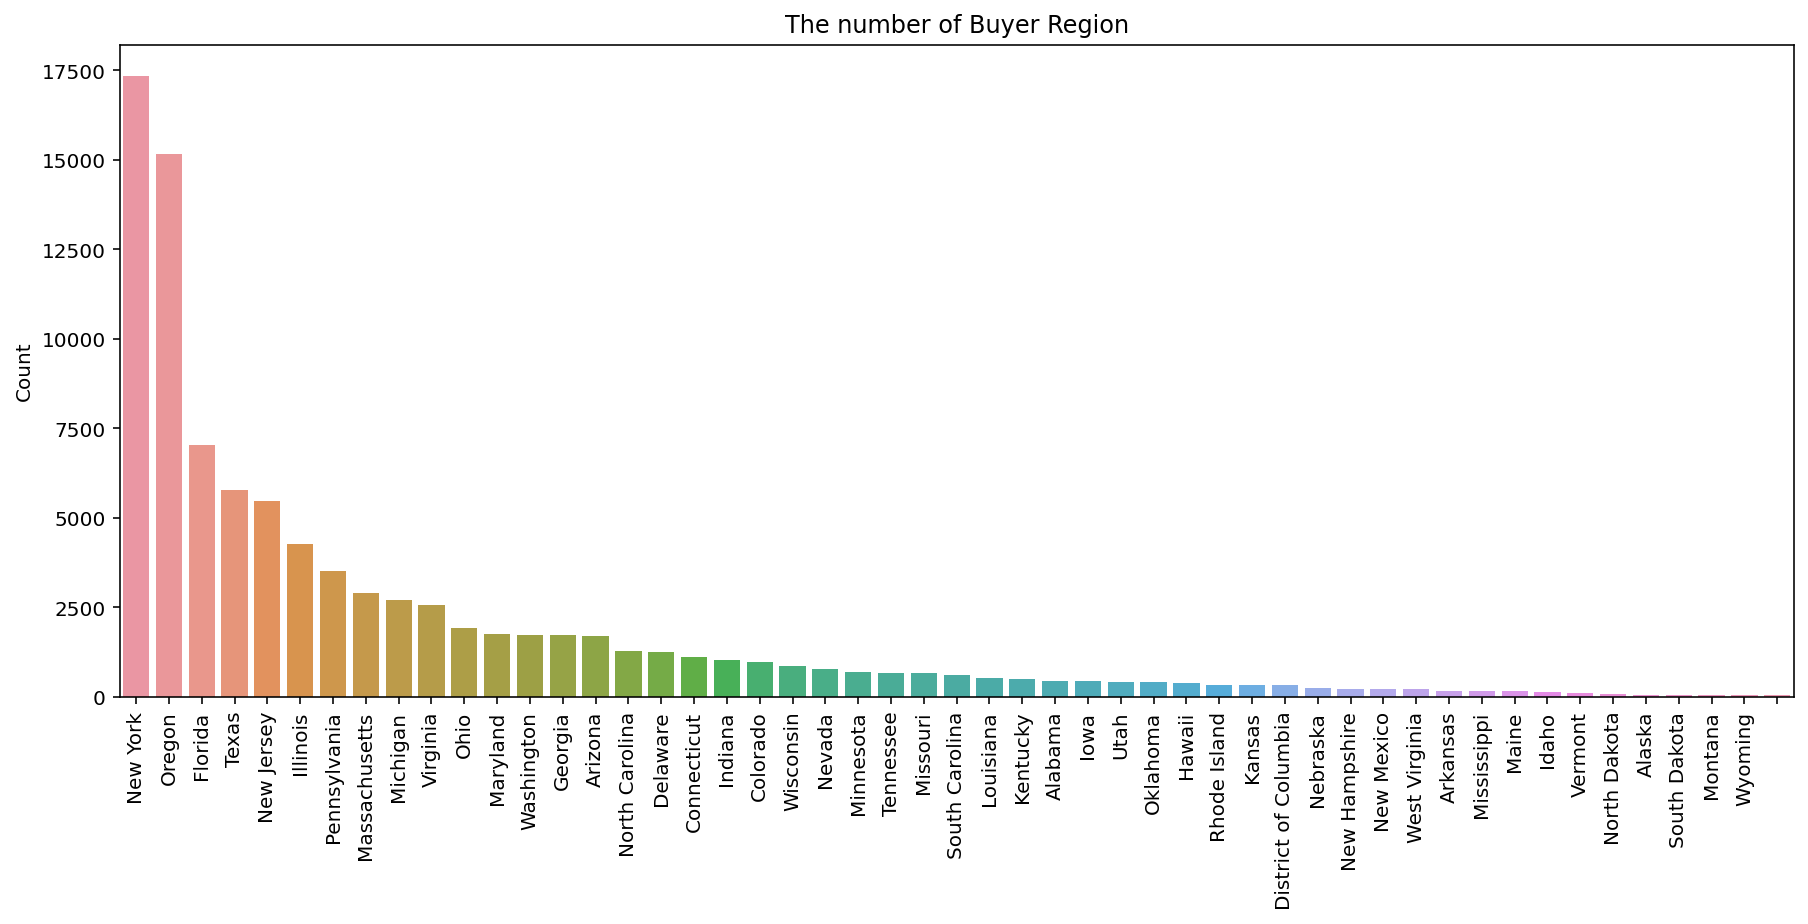

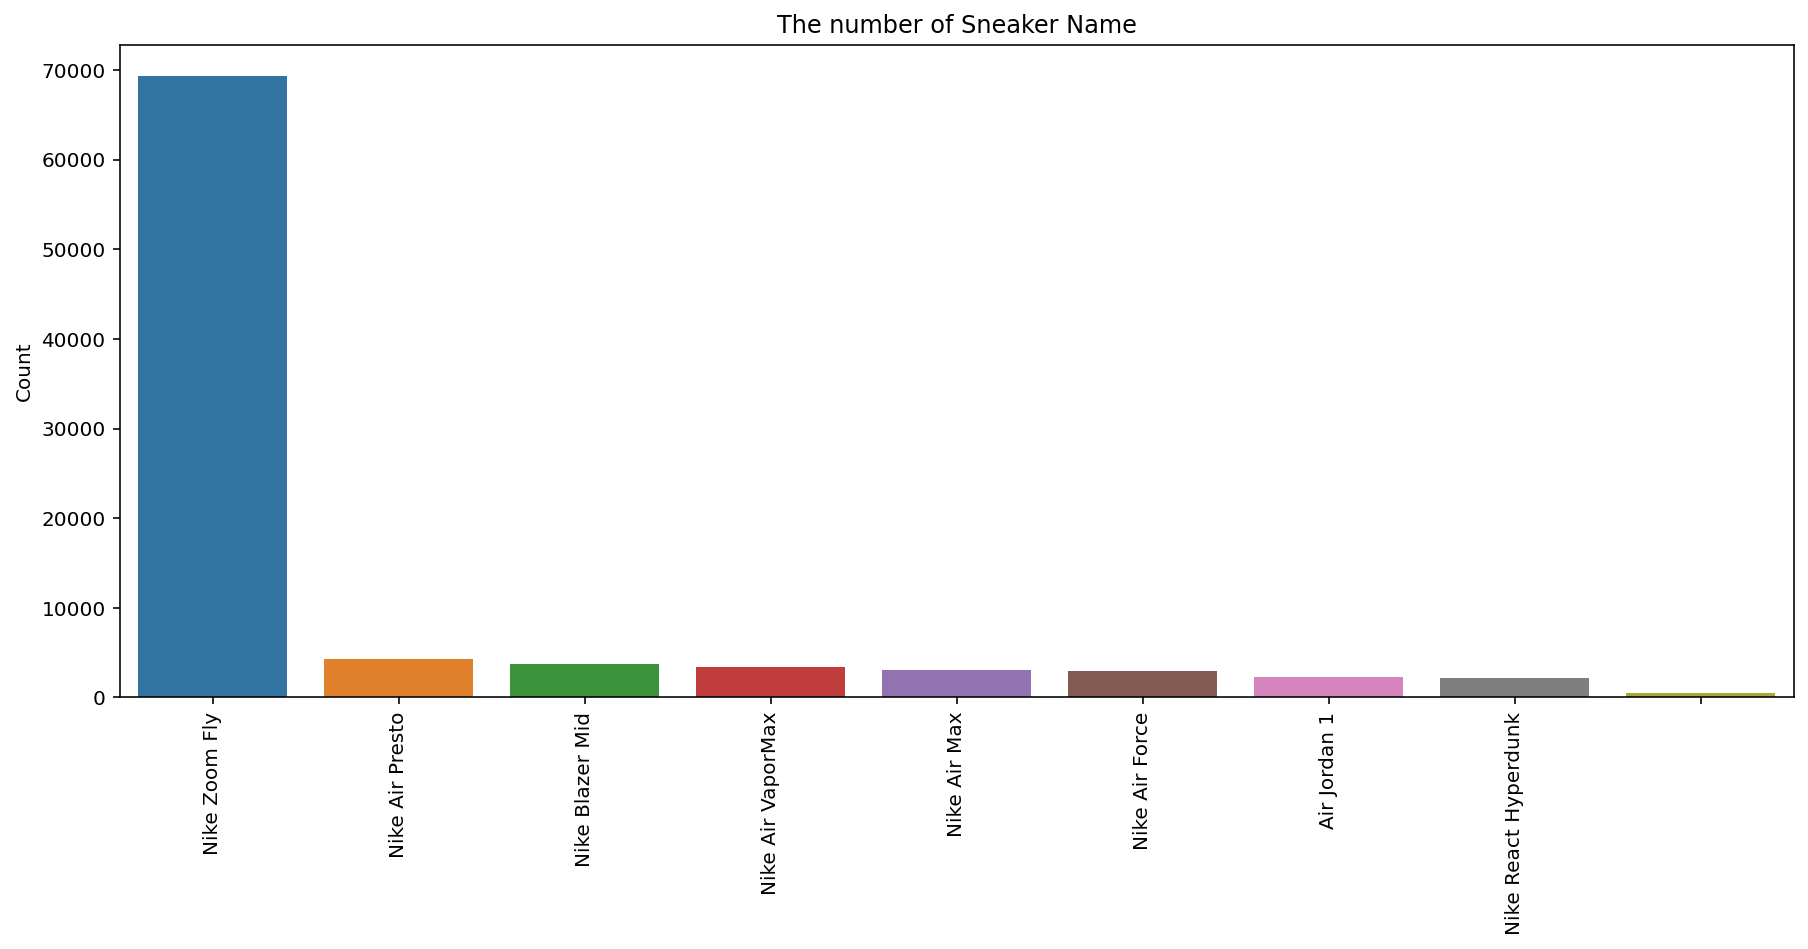

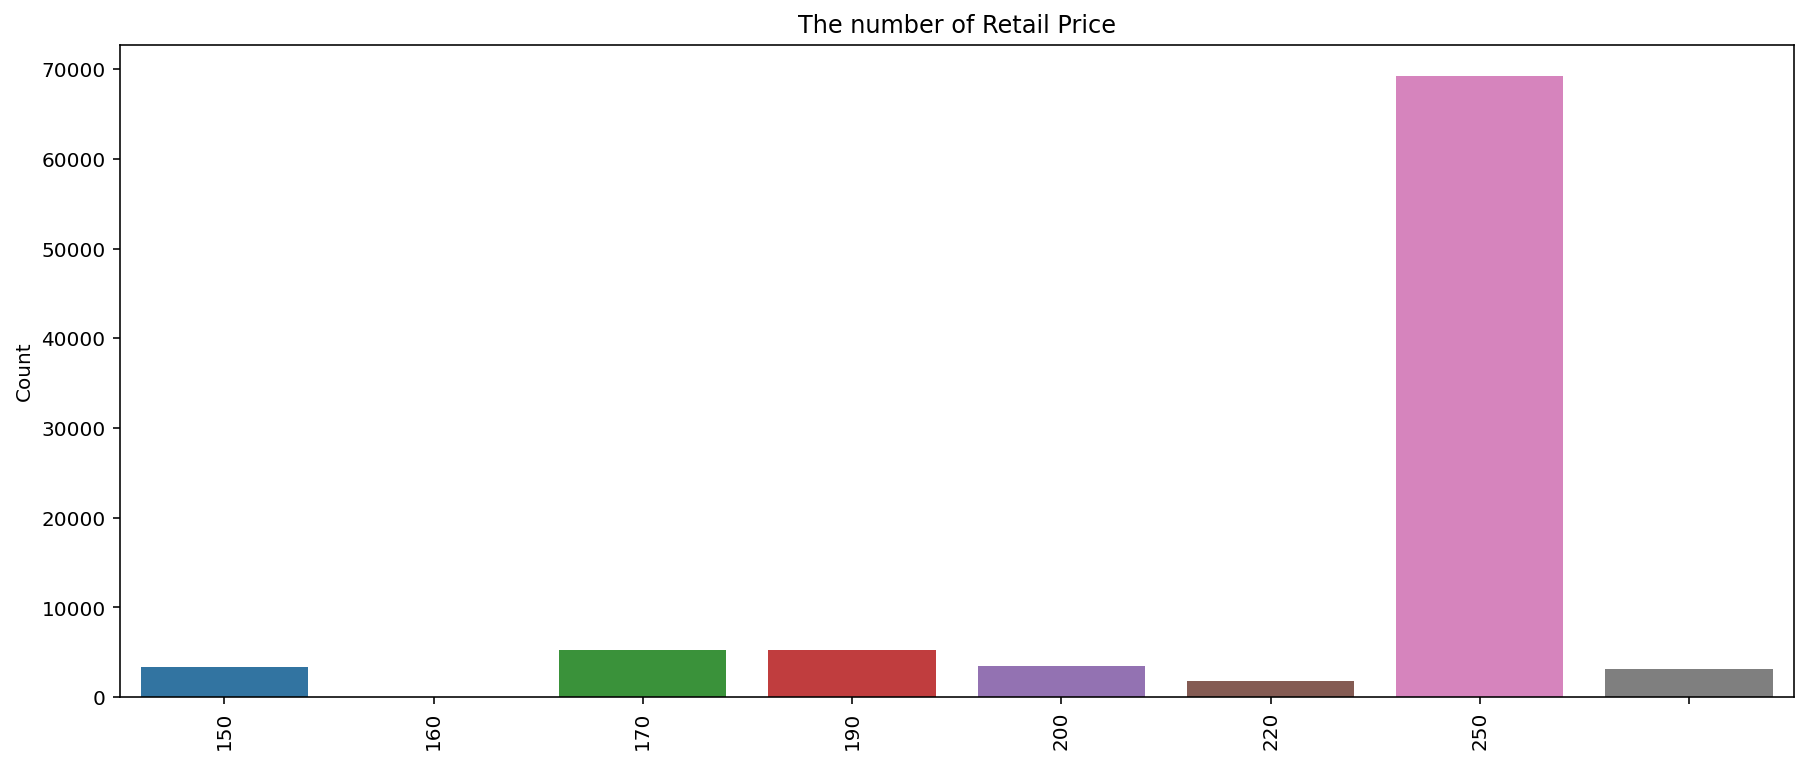

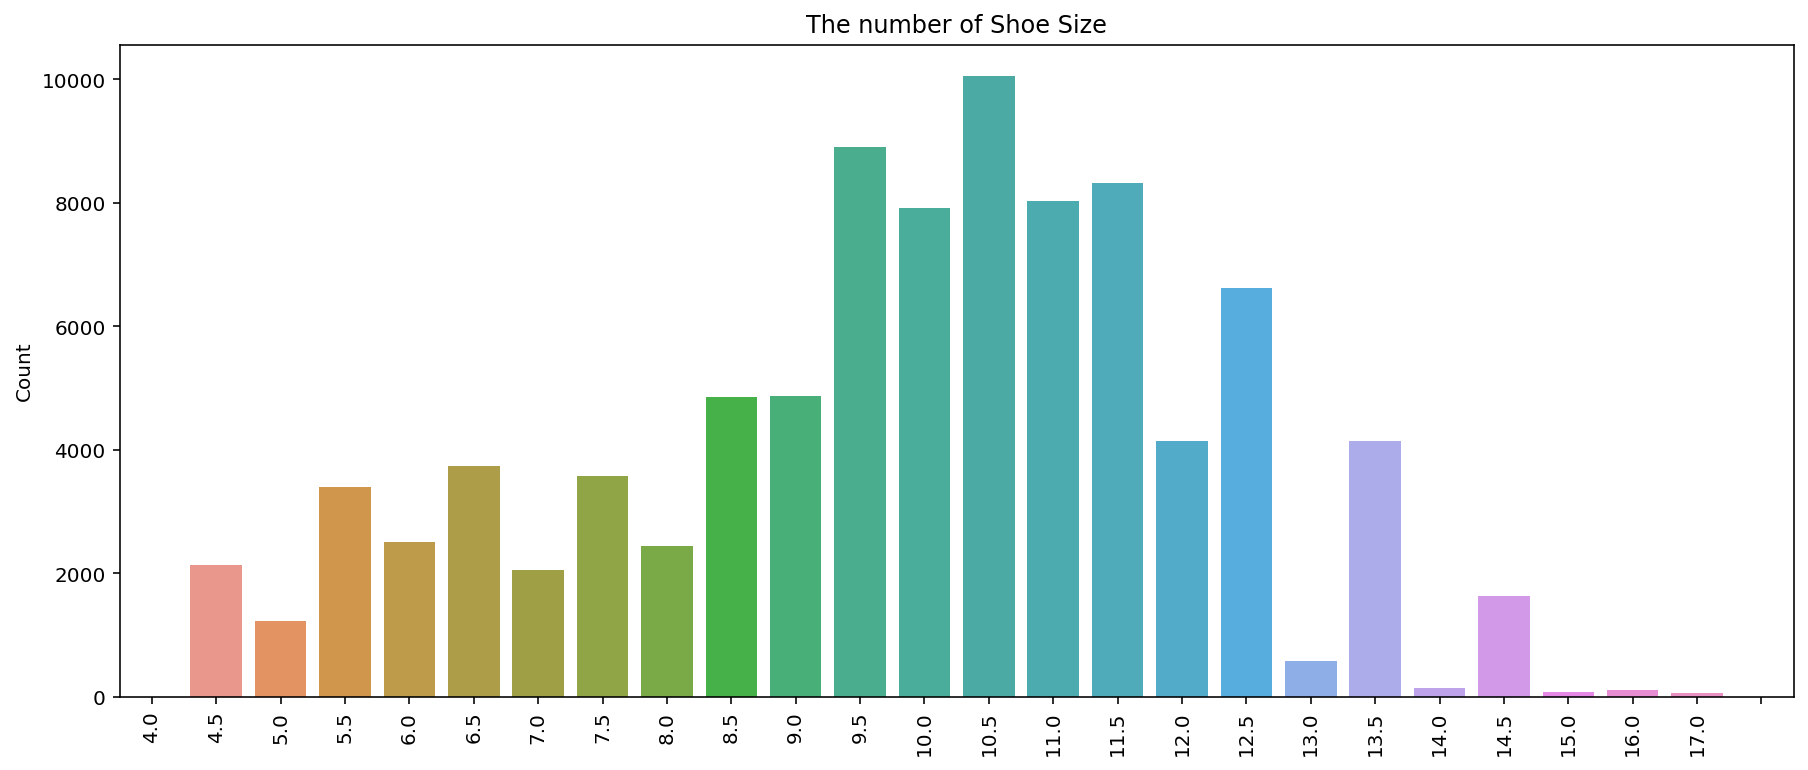

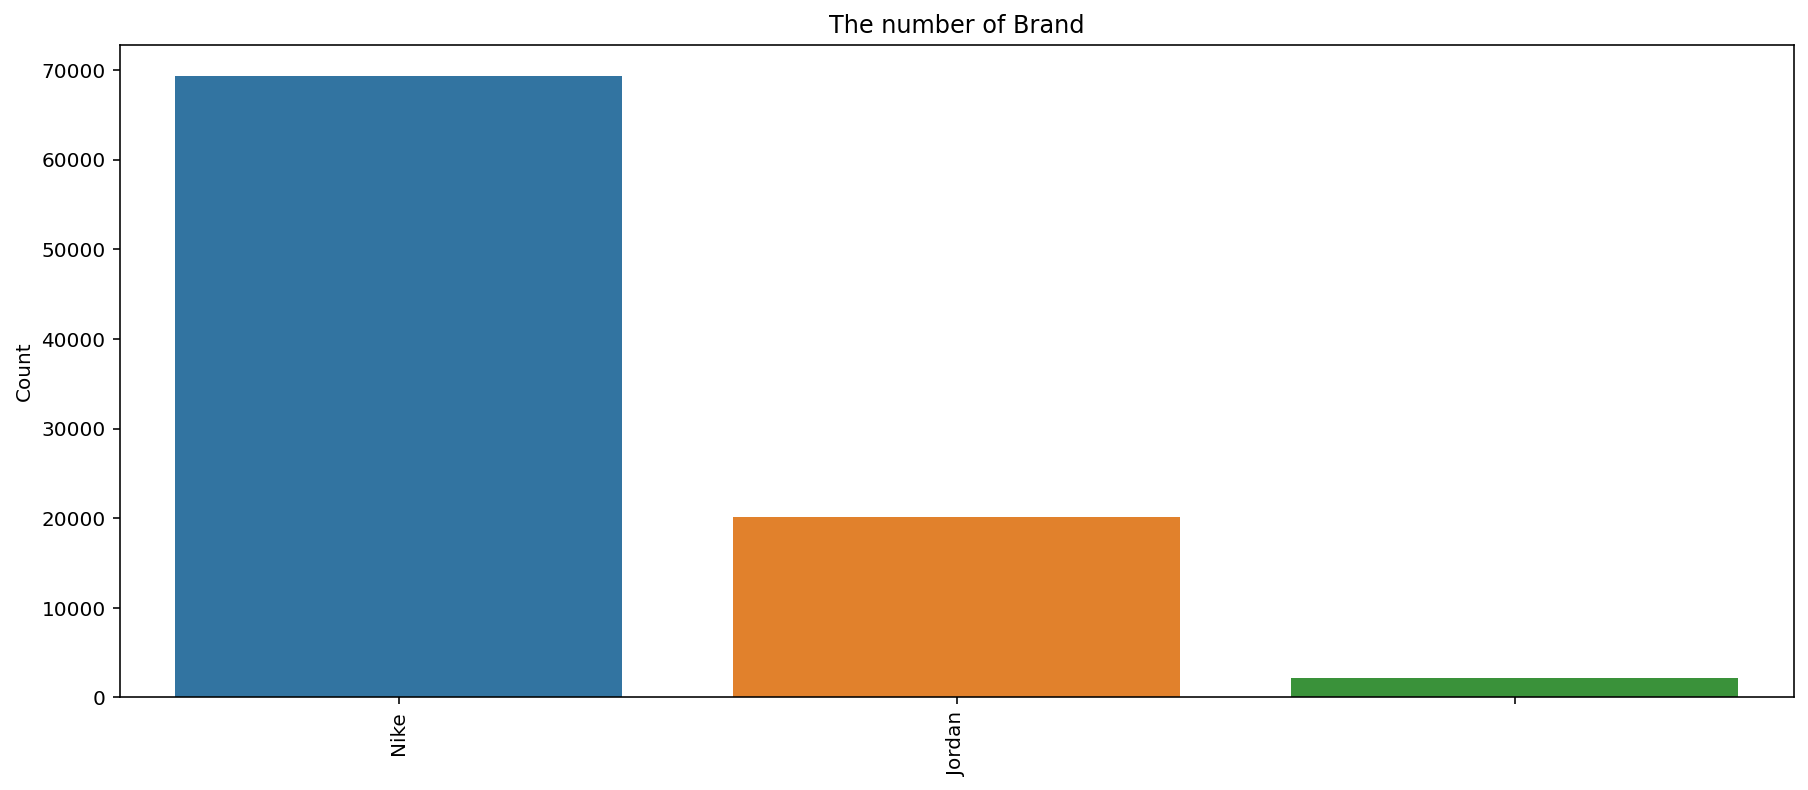

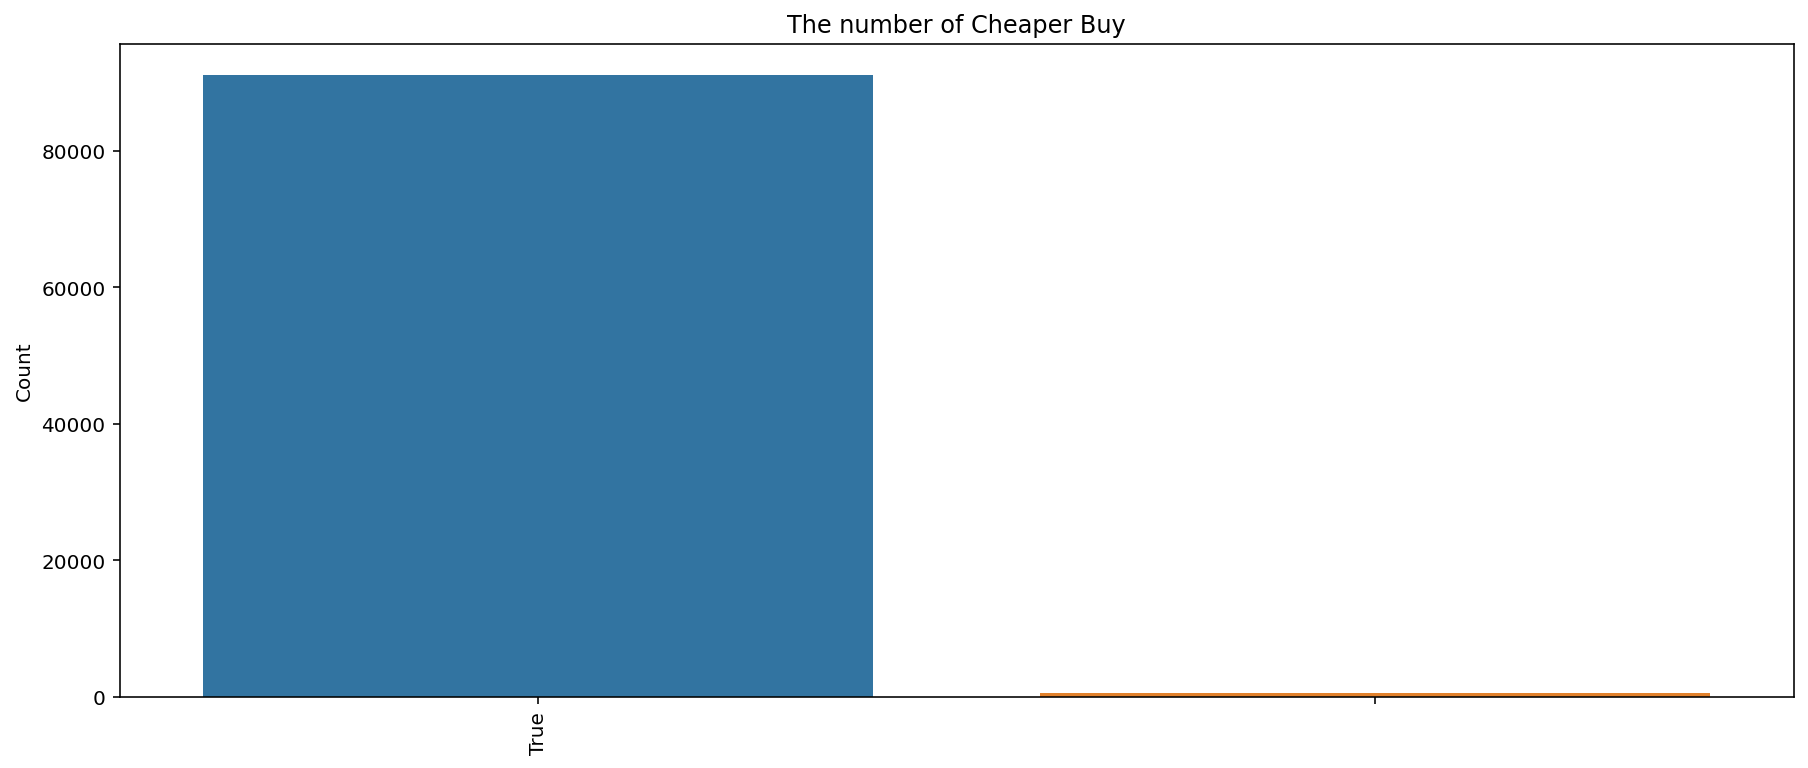

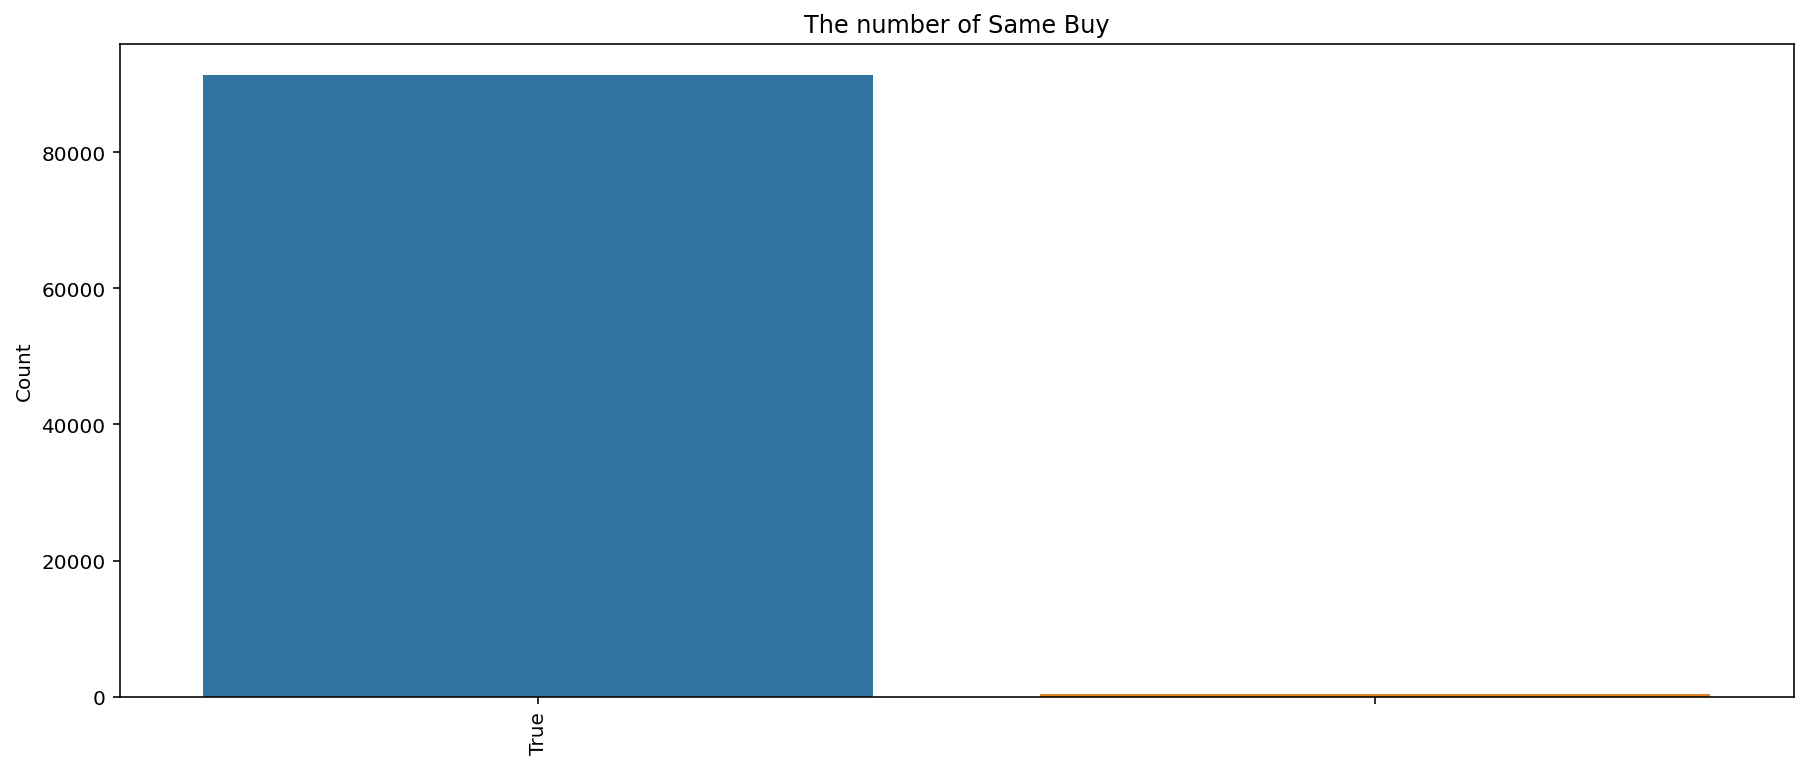

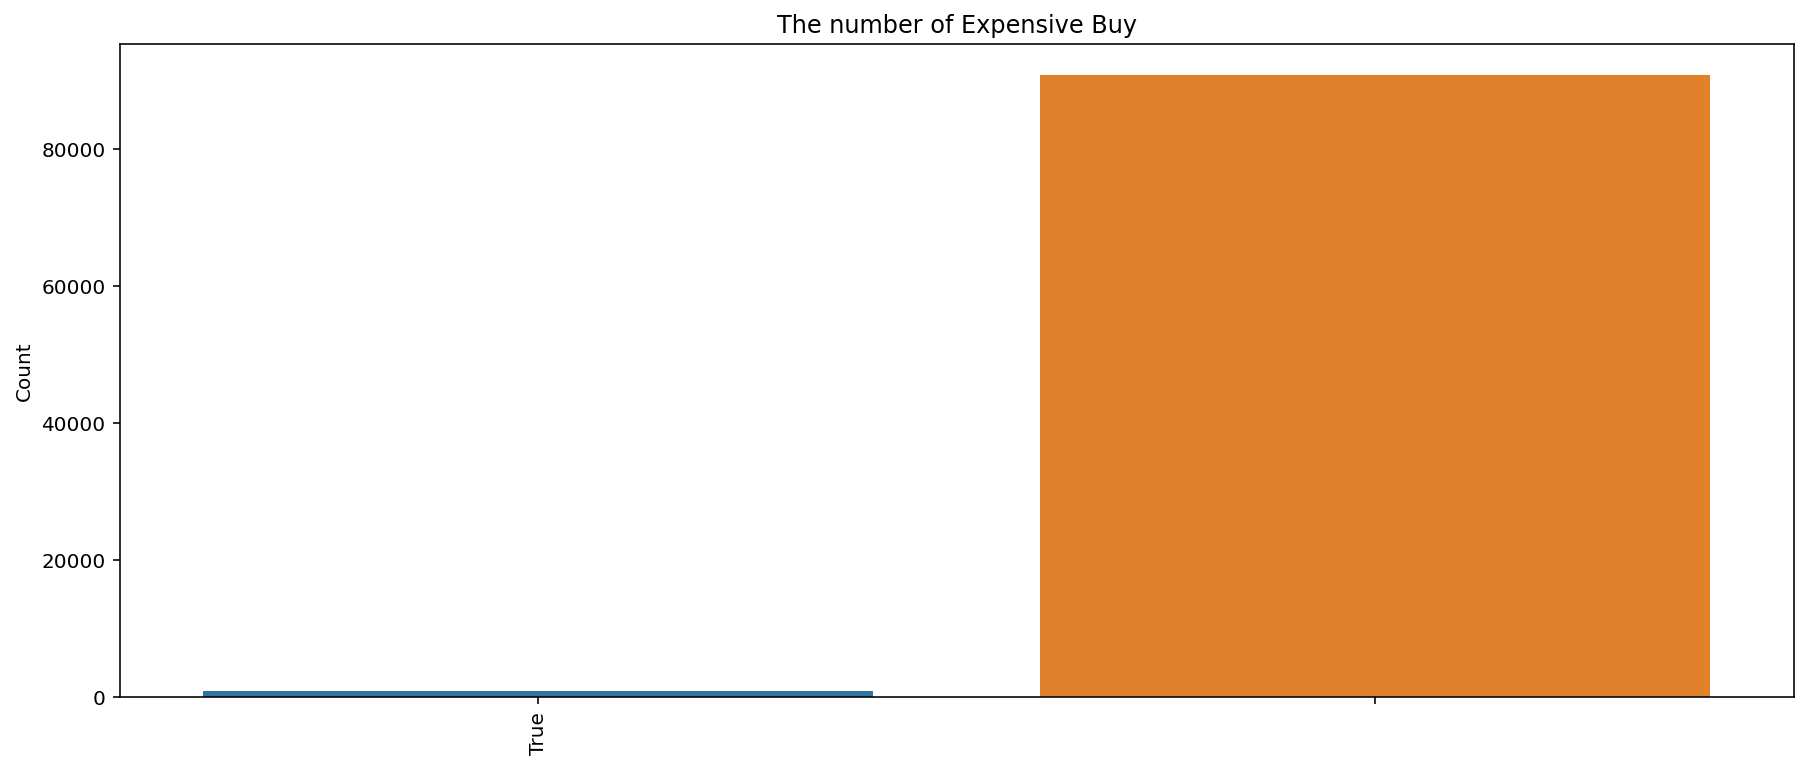

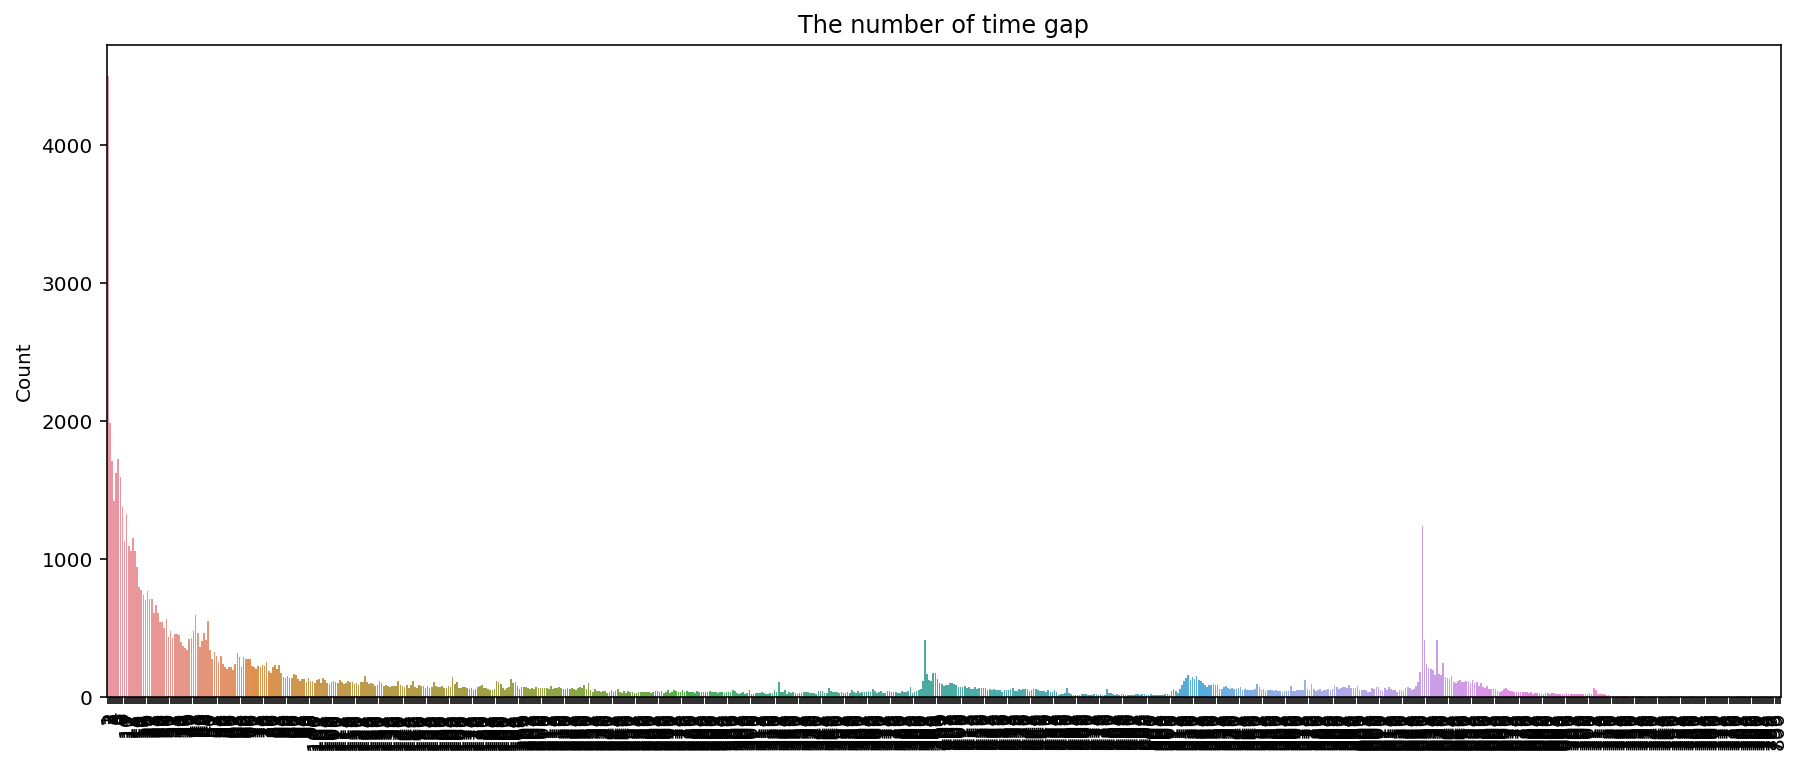

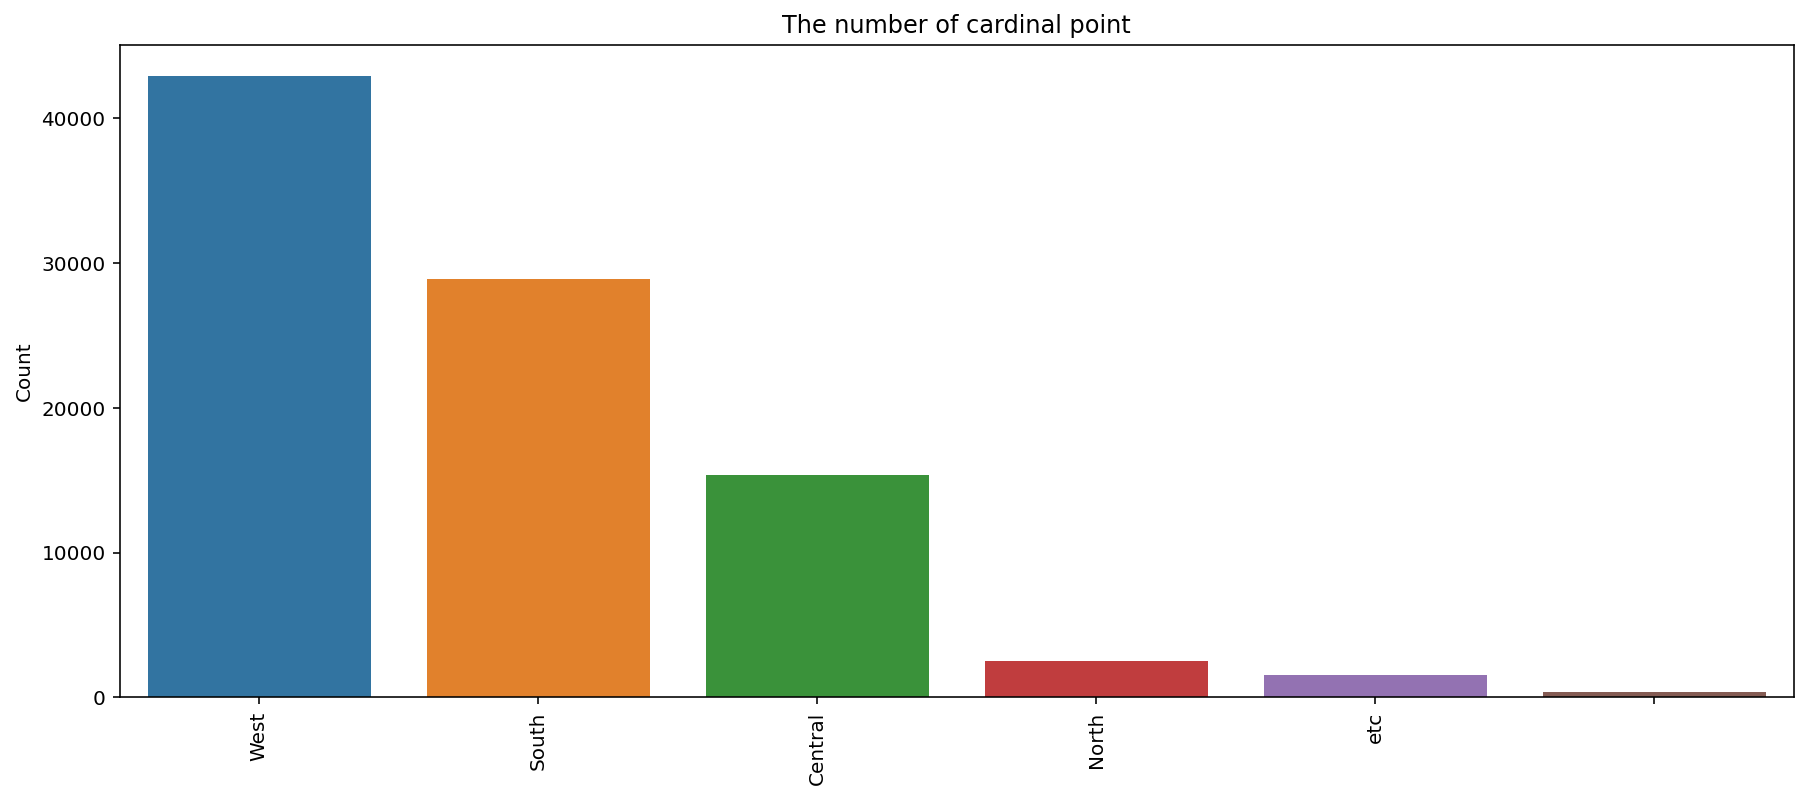

In [55]:
df_cate = ['Release Date','Buyer Region','Sneaker Name',
          'Retail Price','Shoe Size','Brand','Cheaper Buy','Same Buy',
          'Expensive Buy','time gap','cardinal point']

for cate in df_cate:
  cate_num = df[str(cate)].value_counts()
  plt.figure(figsize=(15,6))
  chart = sns.barplot(x = cate_num.index, y=cate_num)
  chart.set_title(f"The number of {cate}")
  plt.ylabel("Count")
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
  plt.show(15)

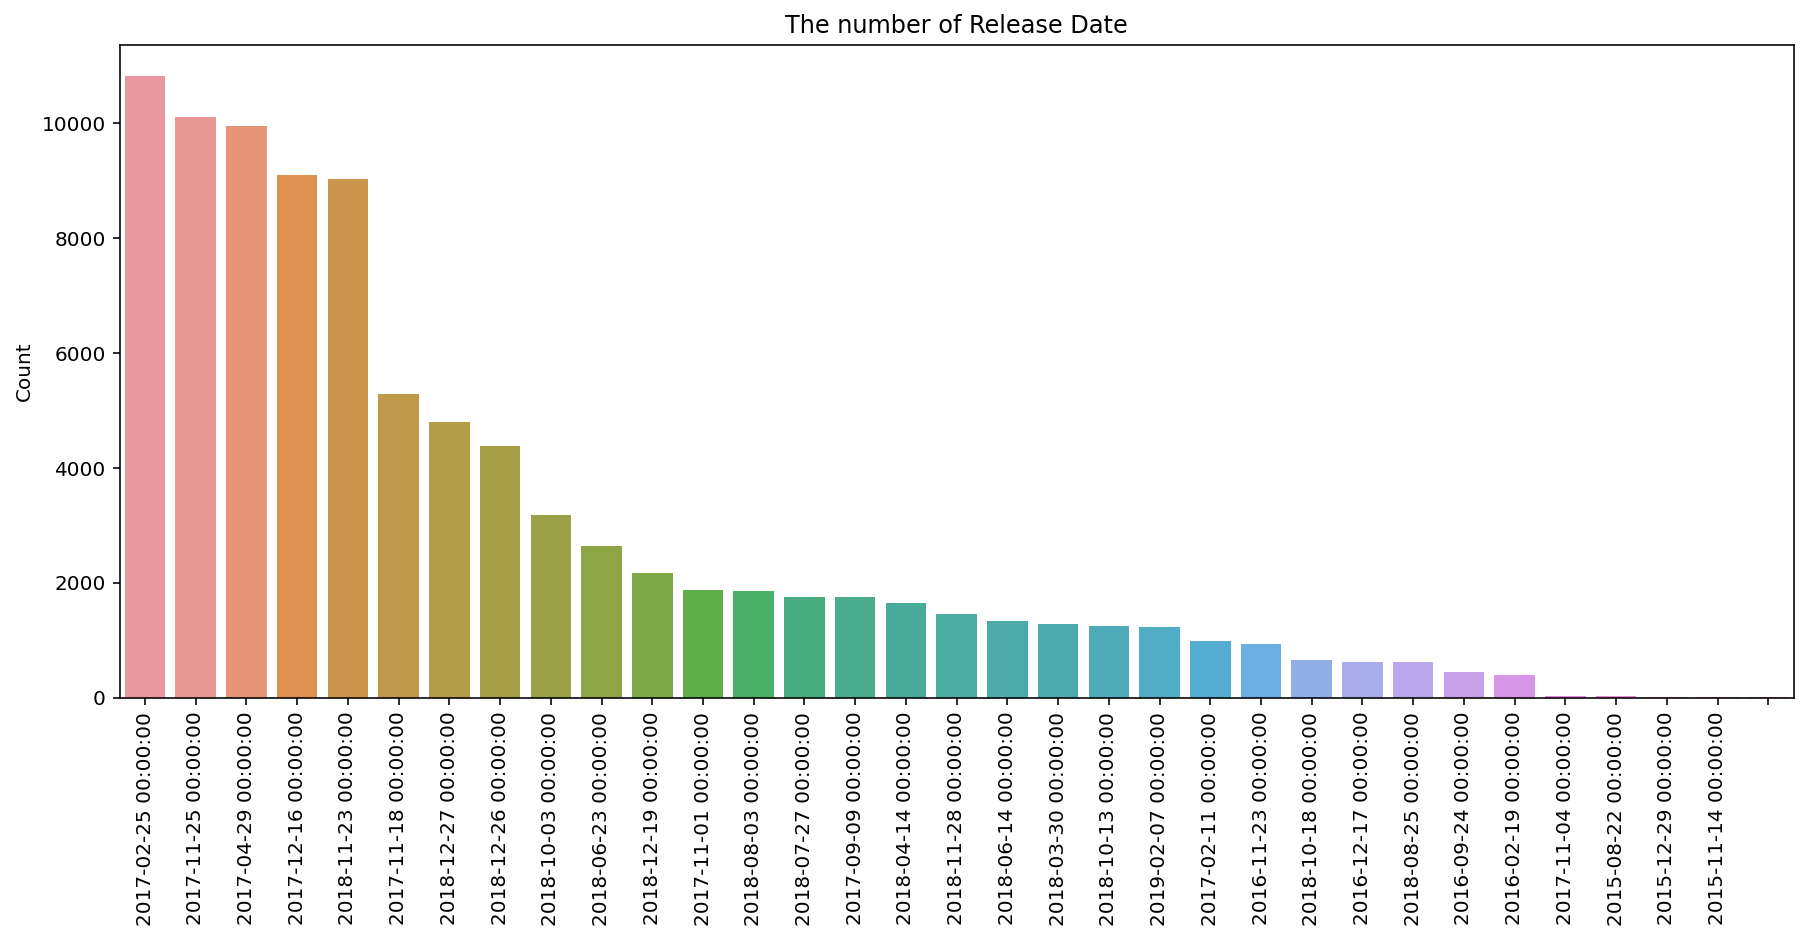

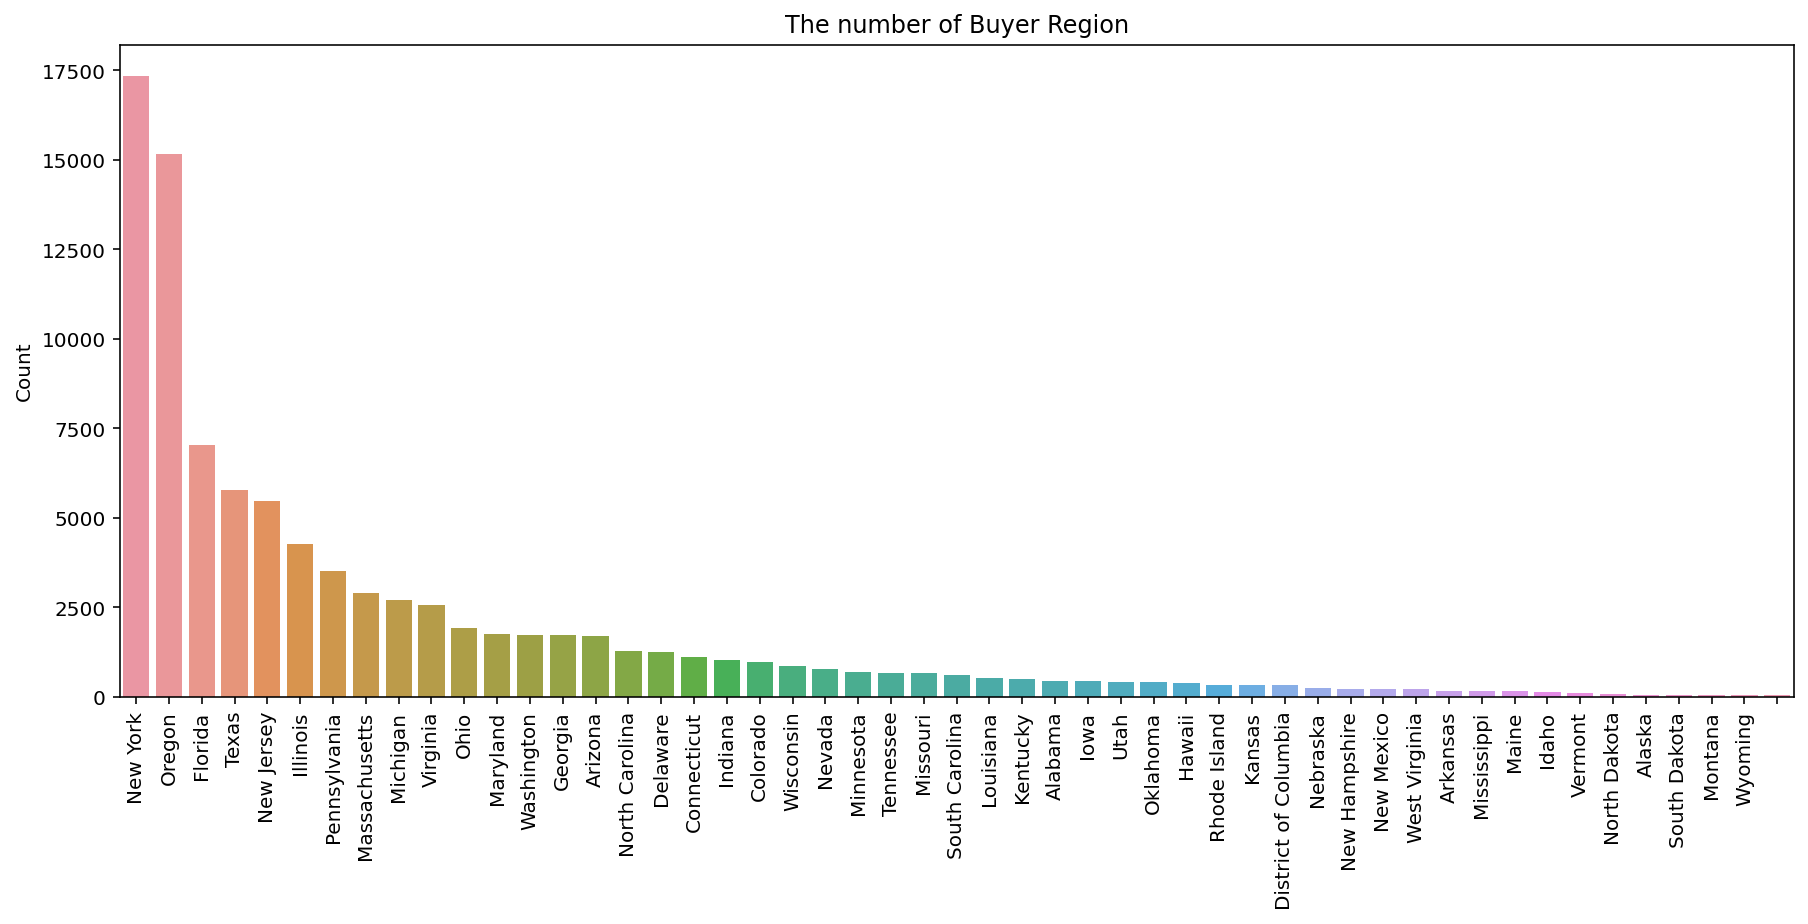

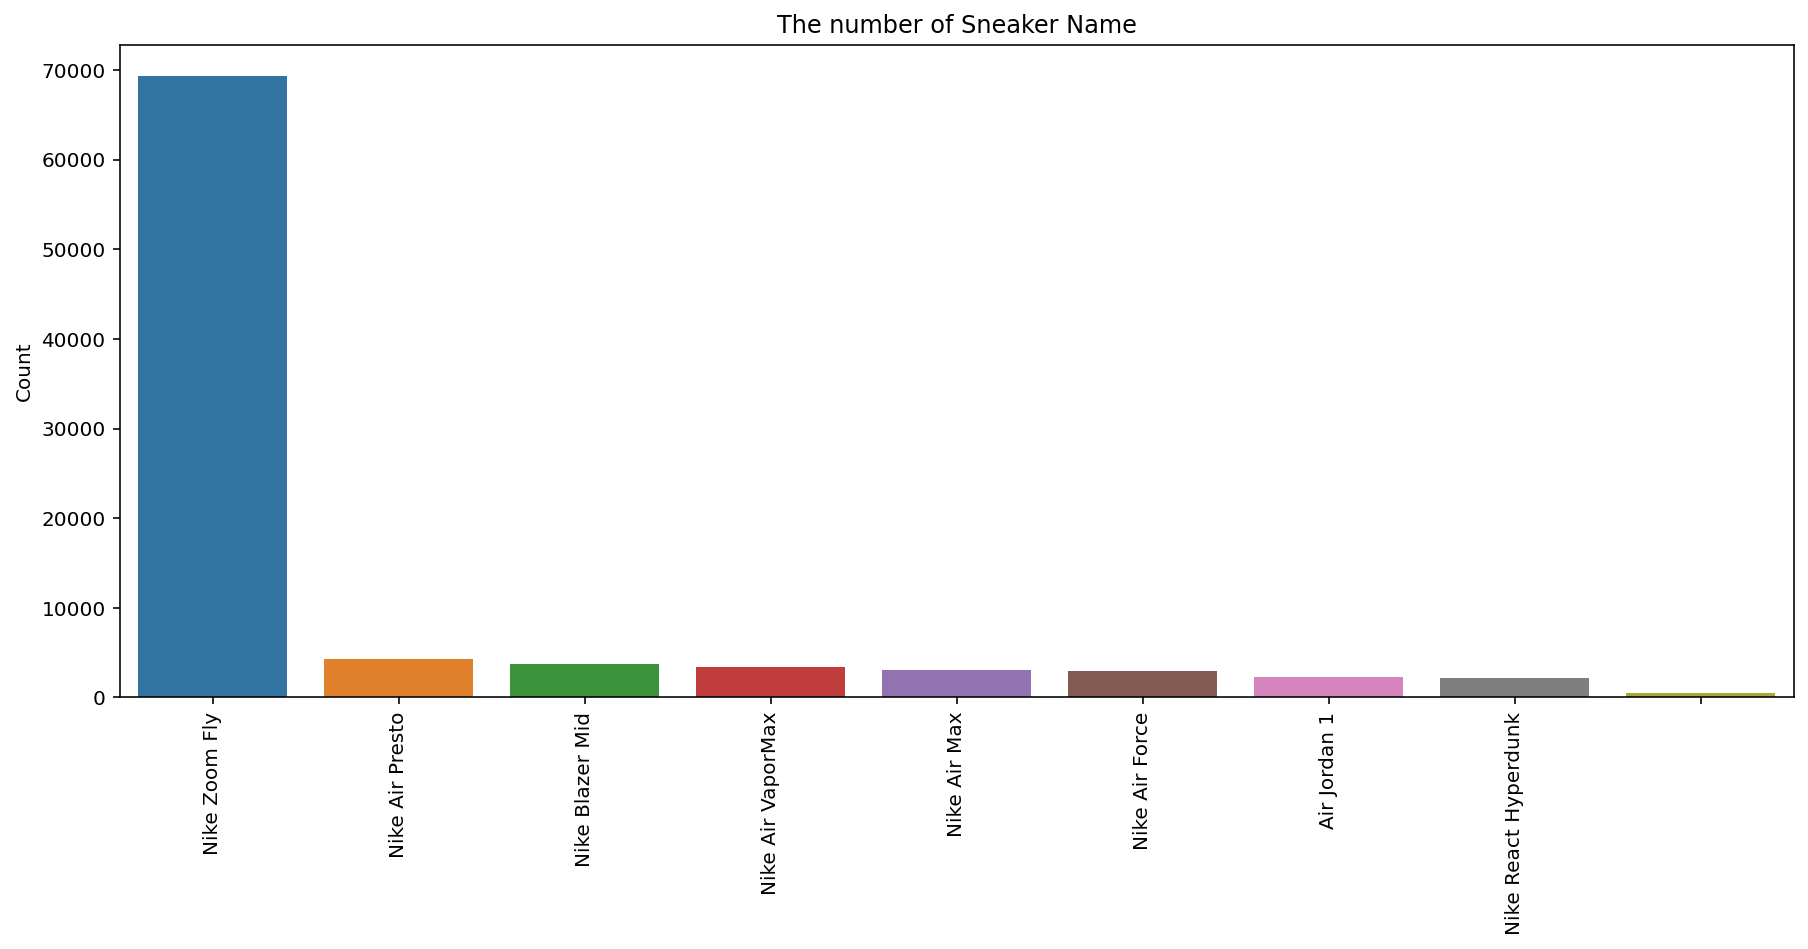

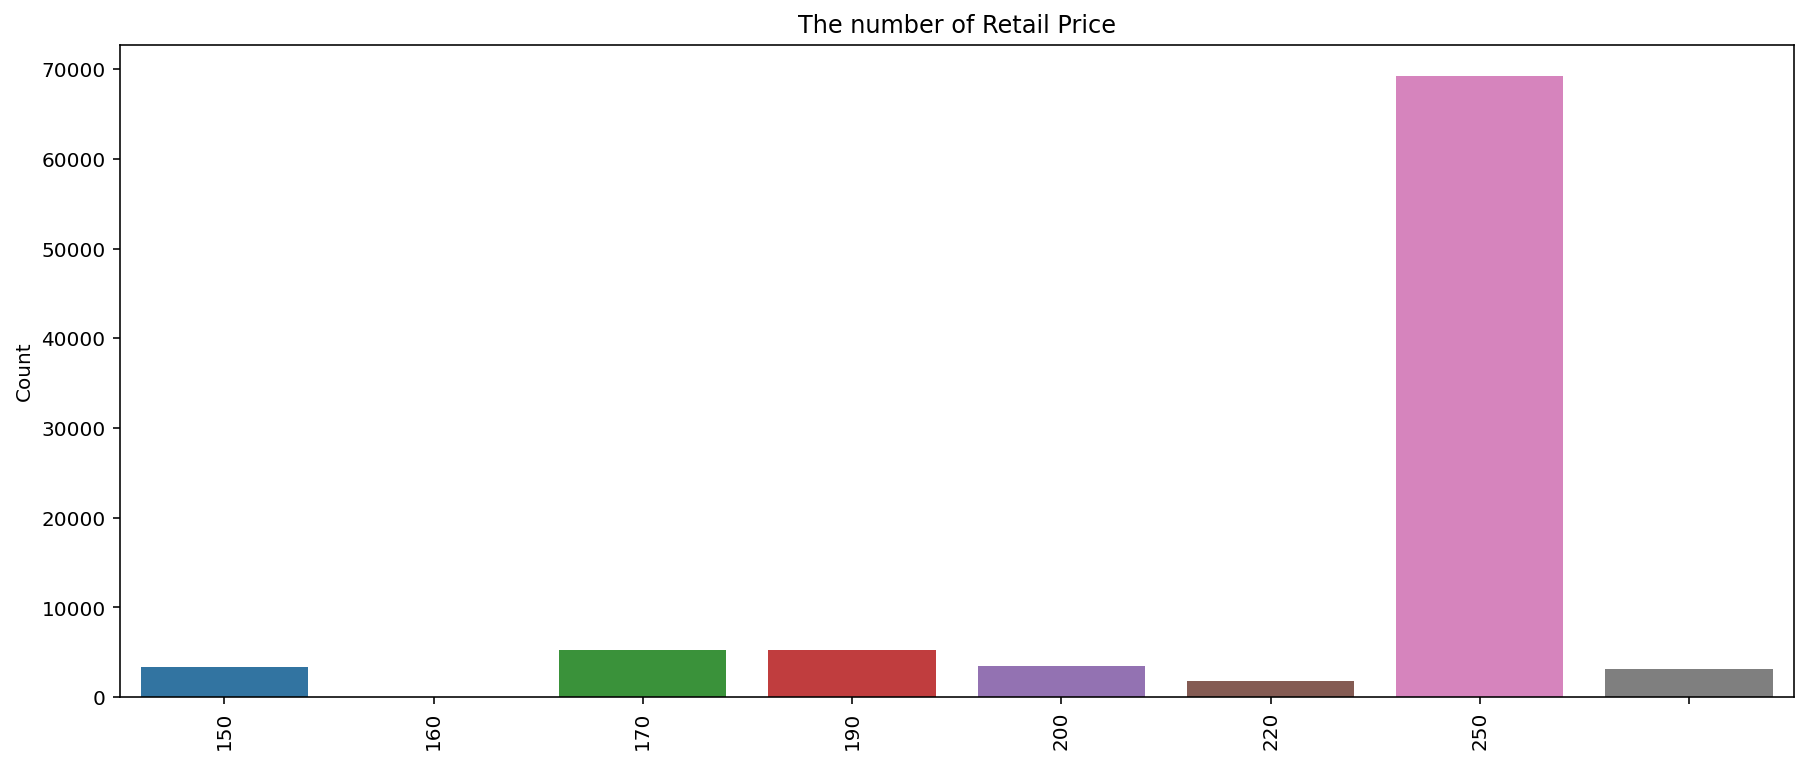

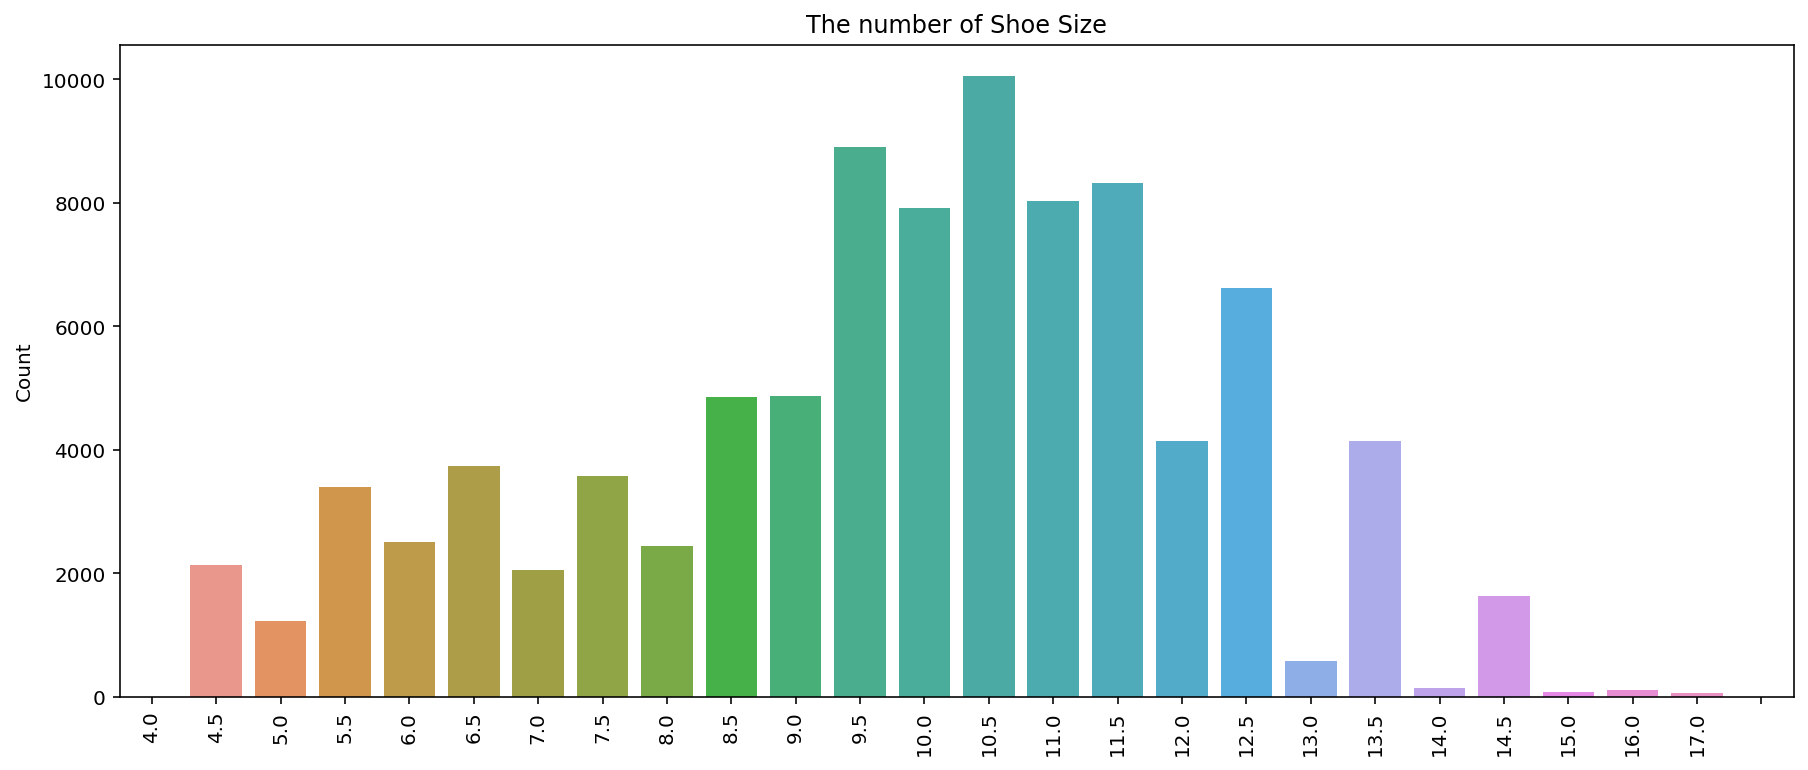

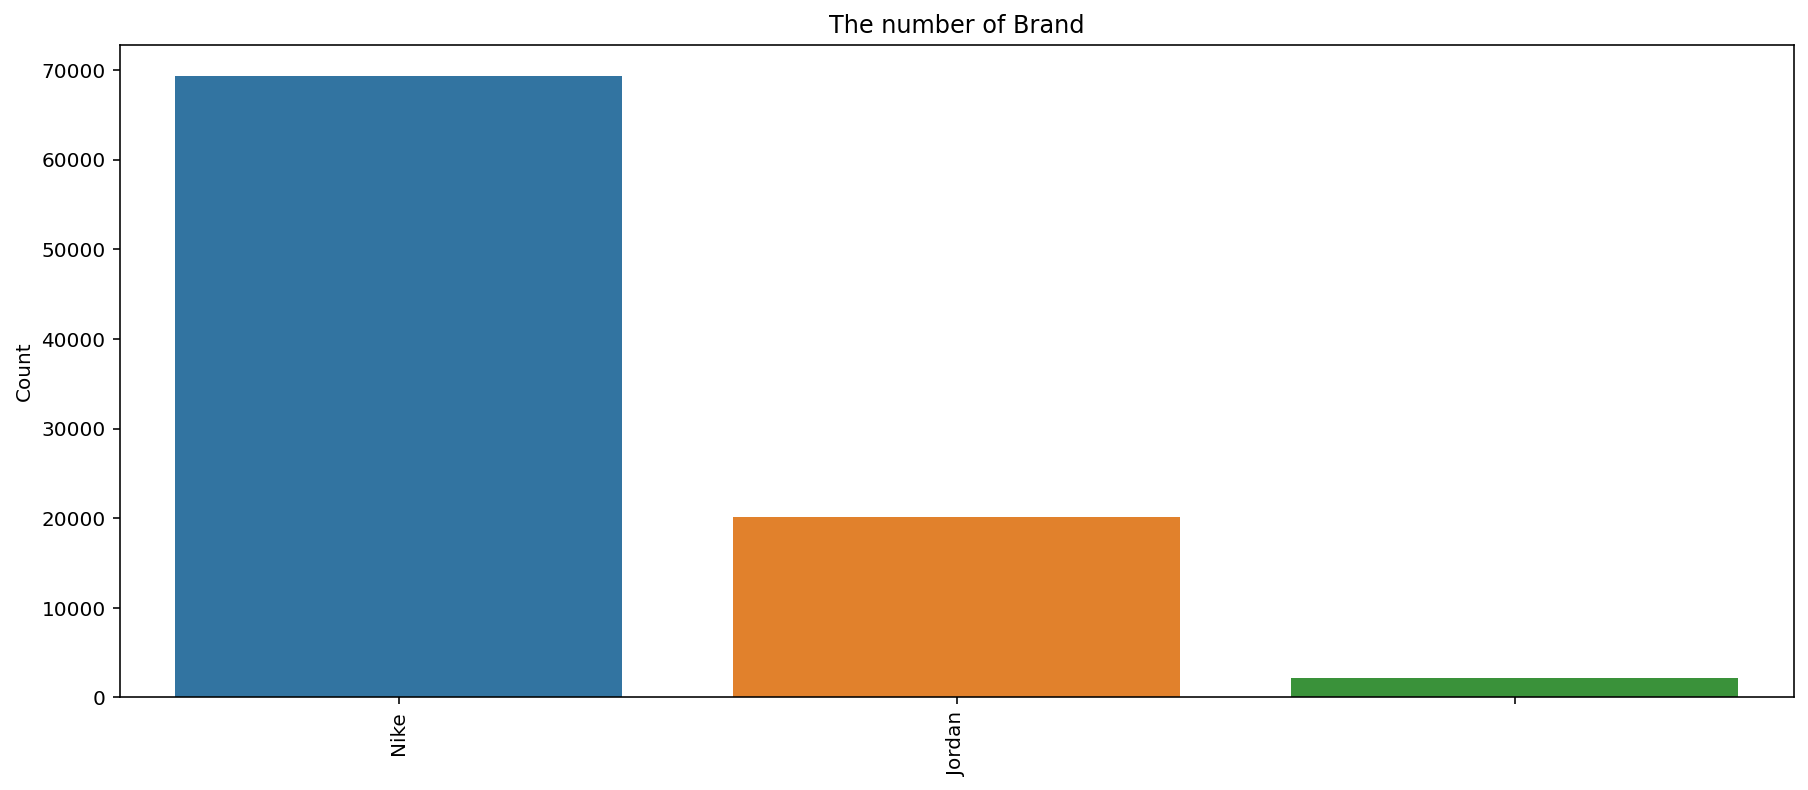

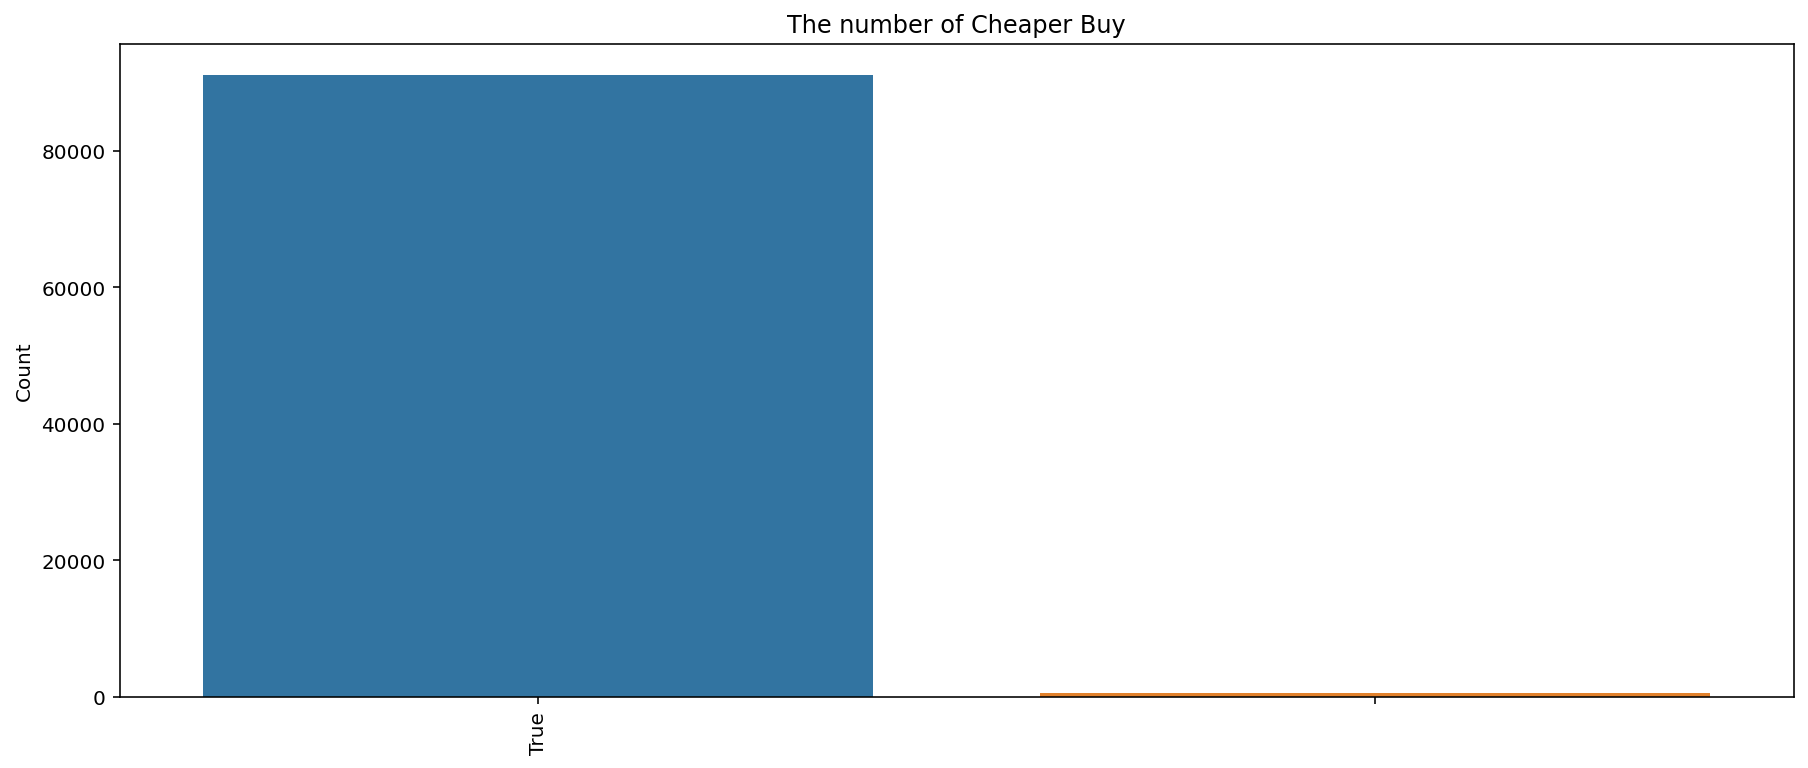

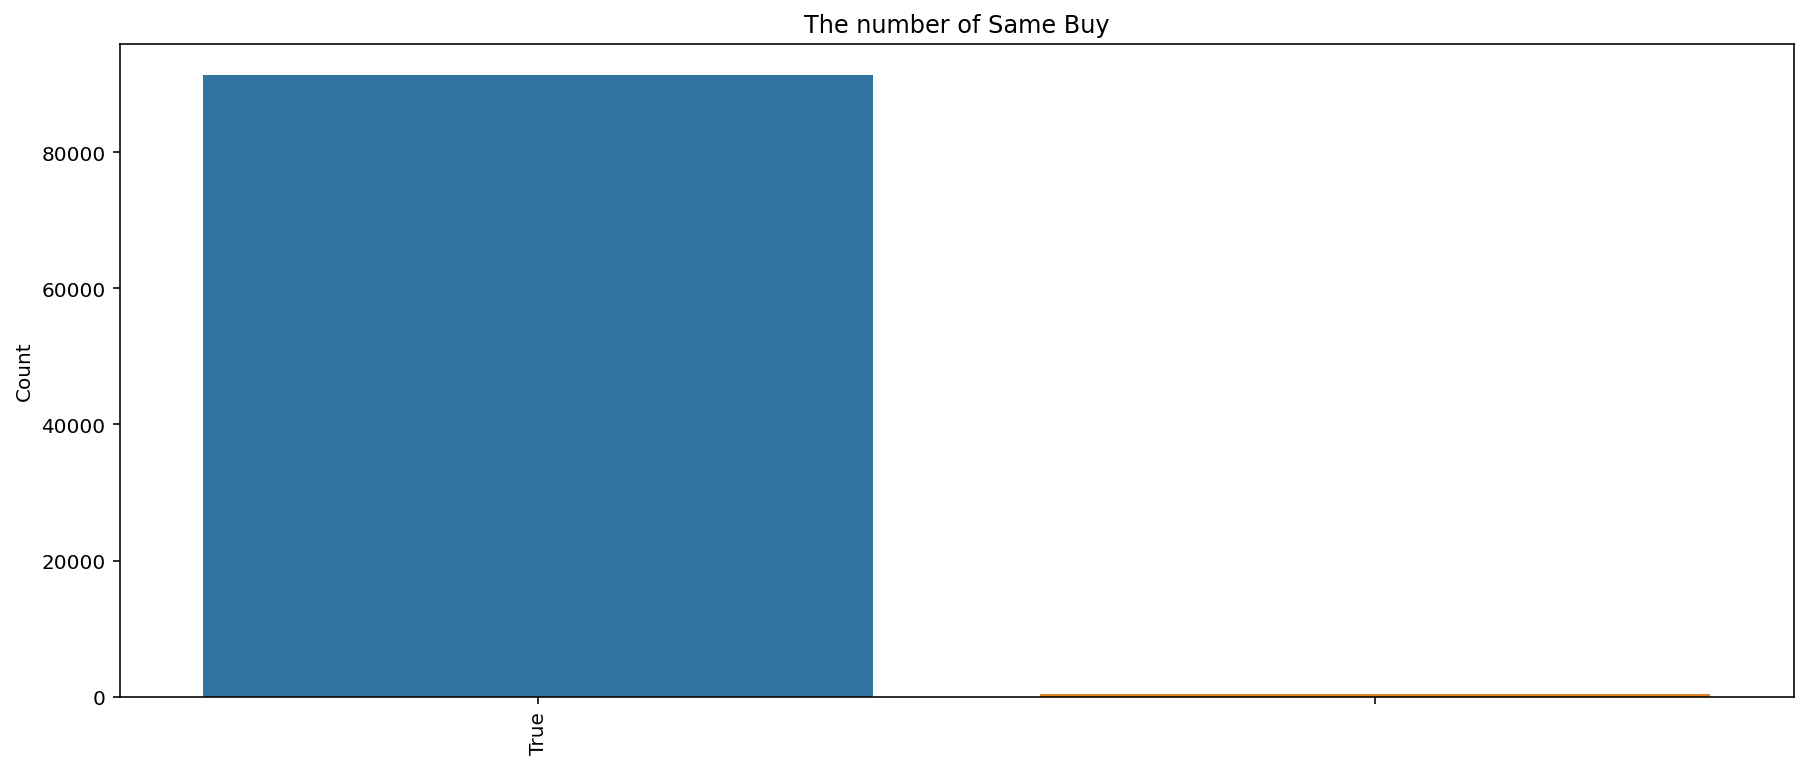

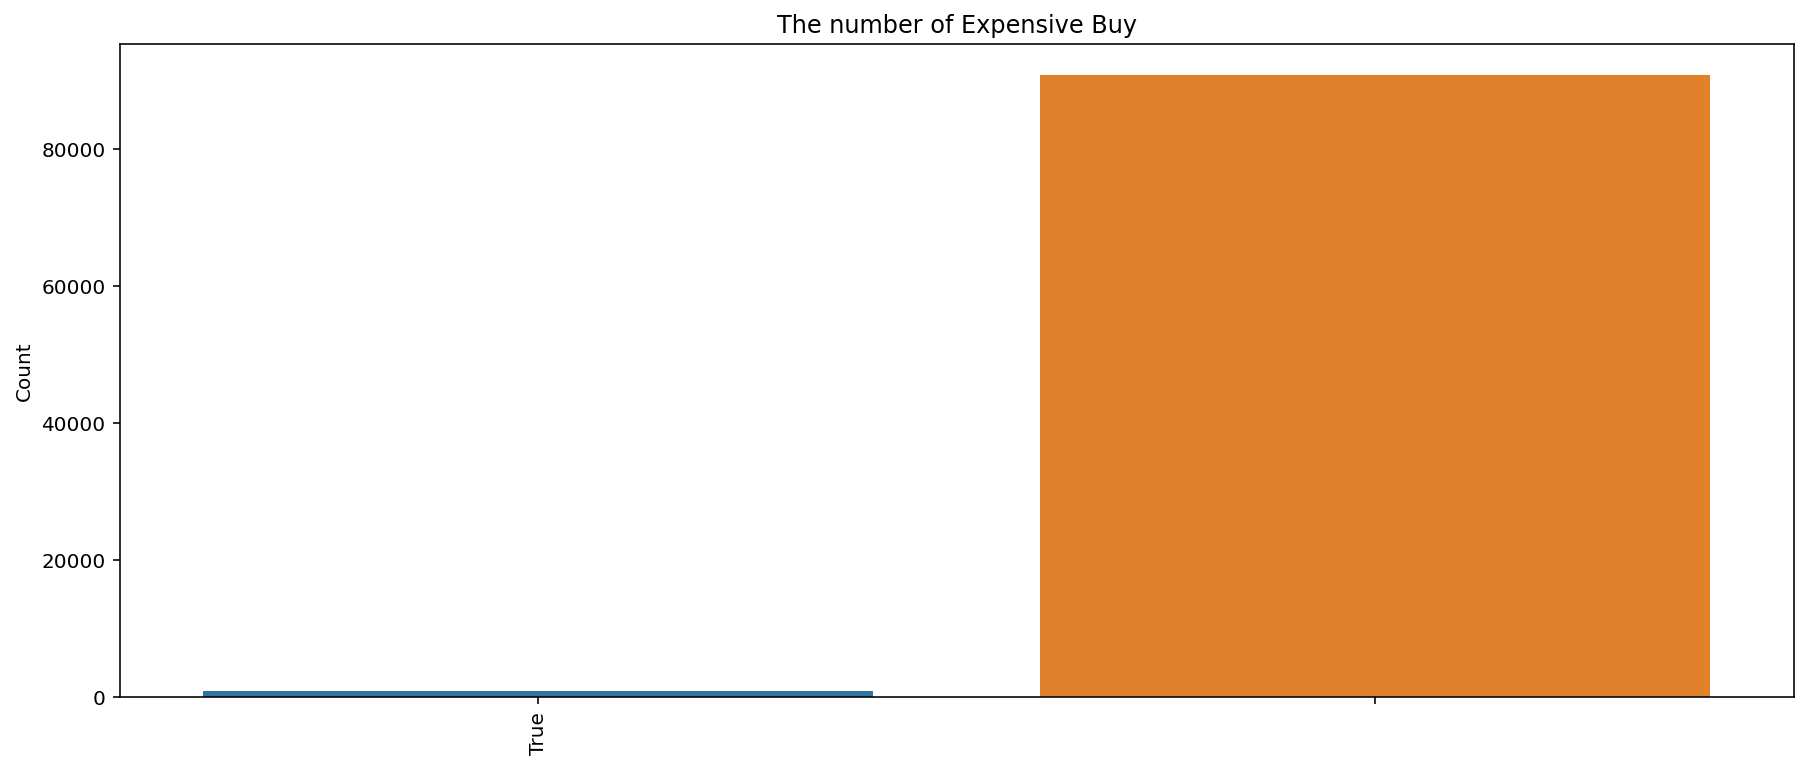

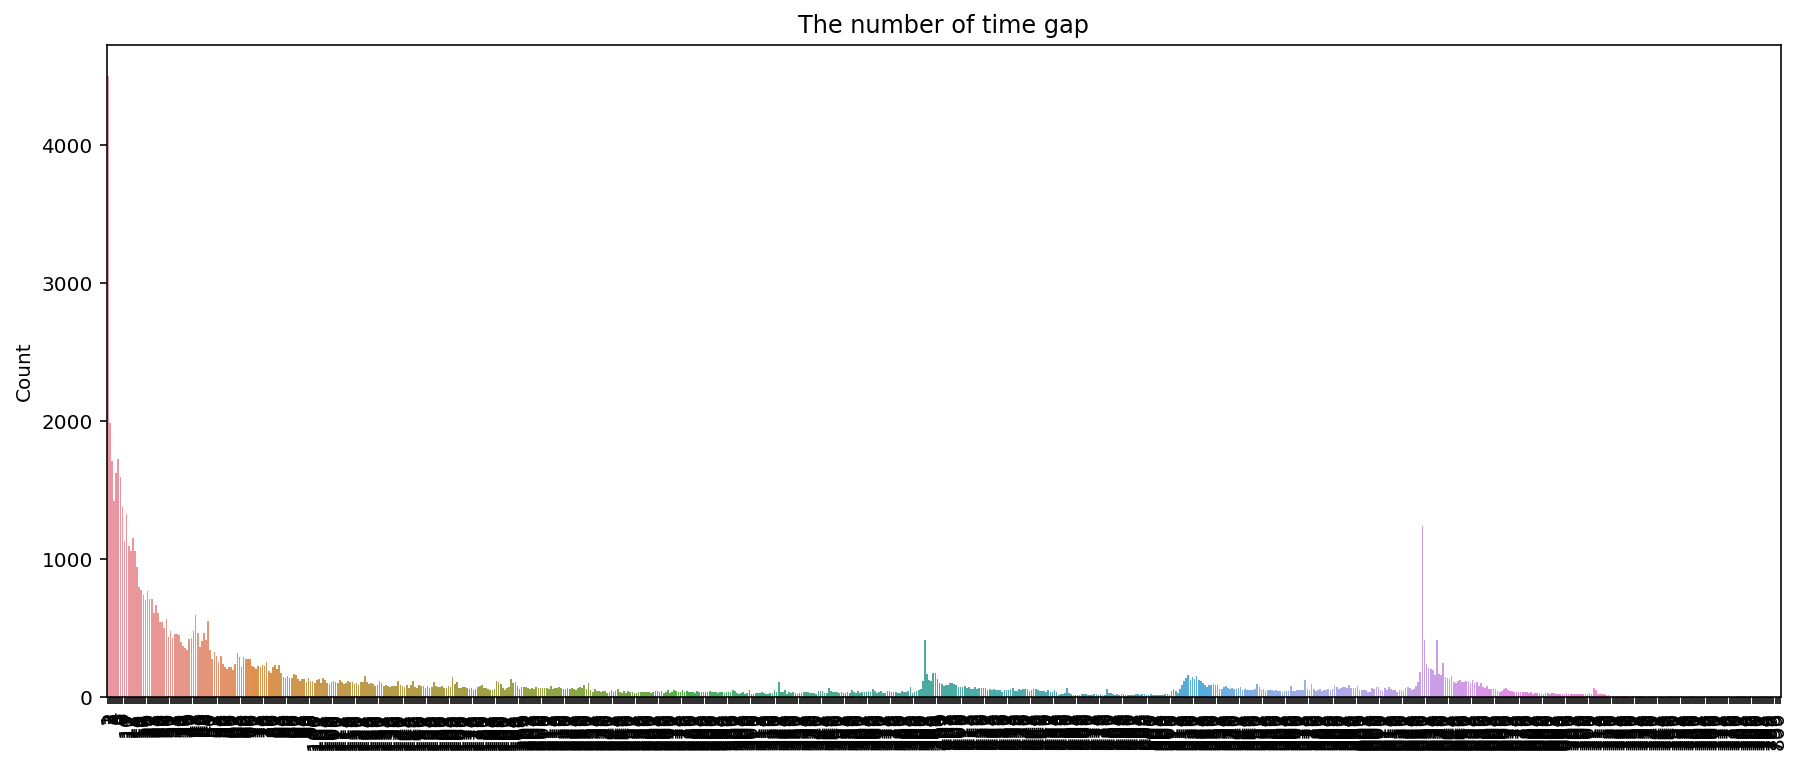

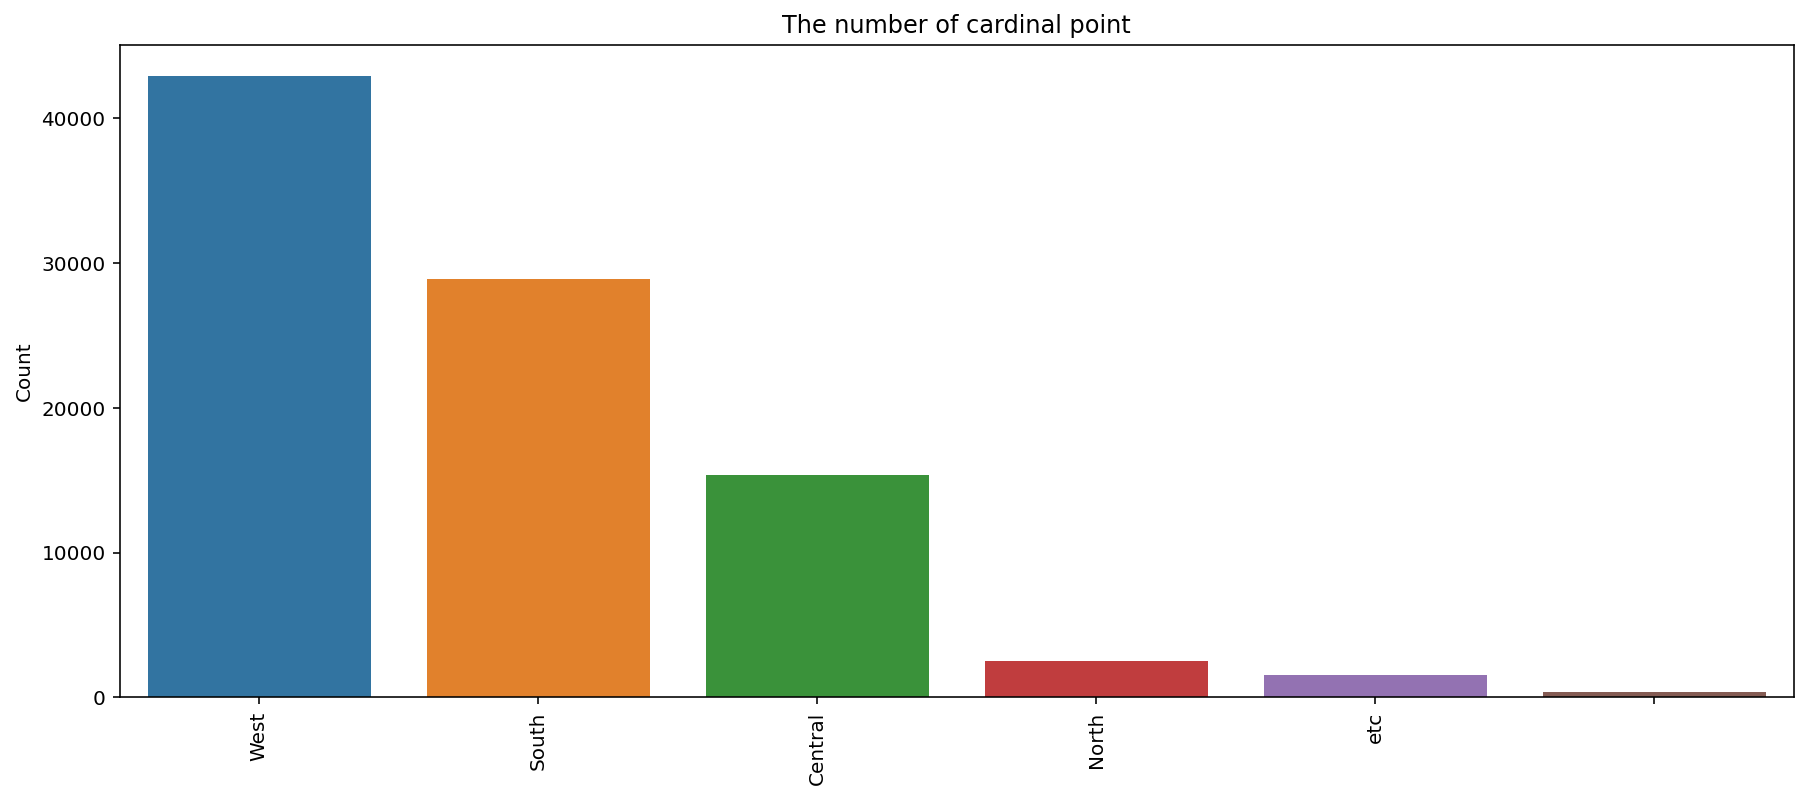

In [56]:
for cate in df_cate:
  cate_num = df[str(cate)].value_counts()
  plt.figure(figsize=(15,6))
  chart = sns.barplot(x = cate_num.index, y=cate_num)
  chart.set_title(f"The number of {cate}")
  plt.ylabel("Count")
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
  plt.show(15)

# EDA
* 추후 인치 및 달러 전환할 필요 있을까

## 이름이 같은 제품의 평균 판매 가격 + (평균 소매 가격 + 팔릴 때까지의 평균 time gap + 최빈 지역?)

In [57]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point', 'multiple_return'],
      dtype='object')

In [58]:
# bruh = df[['Sneaker Name', 'Sale Price','Retail Price','time gap','cardinal point']]
bruh = df[['Sneaker Name', 'Sale Price','cardinal point']]
bruh.head()

,Sneaker Name,Sale Price,cardinal point
0,Adidas Yeezy Boost,685,West
1,Adidas Yeezy Boost,690,West
2,Adidas Yeezy Boost,828,East
3,Adidas Yeezy Boost,798,East
4,Adidas Yeezy Boost,784,West


## 상품 평균가격
* Test 데이터에 나와있는 상품명에 맞게 변경?

In [59]:
sneakernames = ['adidas Yeezy Boost 350 V2 Butter',
       'Adidas Yeezy Boost 350 V2 Beluga 2pt0',
       'Adidas Yeezy Boost 350 V2 Zebra',
       'Adidas Yeezy Boost 350 V2 Blue Tint',
       'Adidas Yeezy Boost 350 V2 Cream White',
       'Adidas Yeezy Boost 350 V2 Sesame', 'adidas Yeezy Boost 350 V2 Static',
       'Adidas Yeezy Boost 350 V2 Semi Frozen Yellow',
       'Air Jordan 1 Retro High Off White University Blue',
       'adidas Yeezy Boost 350 V2 Static Reflective',
       'Nike Air Presto Off White Black 2018',
       'Nike Air Presto Off White White 2018',
       'Nike Air VaporMax Off White 2018',
       'Nike Blazer Mid Off White All Hallows Eve',
       'Nike Blazer Mid Off White Grim Reaper', 'Nike Zoom Fly Off White Pink',
       'Nike Air VaporMax Off White Black',
       'Nike Zoom Fly Off White Black Silver',
       'Nike Air Force 1 Low Off White Volt',
       'Adidas Yeezy Boost 350 V2 Core Black Red 2017',
       'Nike Air Force 1 Low Off White Black White',
       'Air Jordan 1 Retro High Off White Chicago',
       'Nike Air Max 90 Off White Black',
       'Nike Zoom Fly Mercurial Off White Total Orange',
       'Nike Air Max 90 Off White Desert Ore',
       'Nike Zoom Fly Mercurial Off White Black', 'Nike Air Max 90 Off White',
       'Adidas Yeezy Boost 350 V2 Core Black White',
       'Nike Air Presto Off White', 'Nike Air Max 97 Off White',
       'Nike Air VaporMax Off White', 'Nike Blazer Mid Off White',
       'Adidas Yeezy Boost 350 Low V2 Beluga',
       'Nike React Hyperdunk 2017 Flyknit Off White',
       'Nike Air Force 1 Low Off White', 'Nike Zoom Fly Off White',
       'Nike Air Max 97 Off White Menta',
       'Air Jordan 1 Retro High Off White White',
       'Adidas Yeezy Boost 350 V2 Core Black Red',
       'Nike Air Max 97 Off White Black',
       'Nike Blazer Mid Off White Wolf Grey',
       'Adidas Yeezy Boost 350 V2 Core Black Copper',
       'Nike Air Max 97 Off White Elemental Rose Queen',
       'Adidas Yeezy Boost 350 V2 Core Black Green',
       'Adidas Yeezy Boost 350 Low Pirate Black 2016',
       'Adidas Yeezy Boost 350 Low Moonrock',
       'Adidas Yeezy Boost 350 Low Pirate Black 2015',
       'Adidas Yeezy Boost 350 Low Oxford Tan',
       'Adidas Yeezy Boost 350 Low Turtledove',
       'Nike Air Force 1 Low Virgil Abloh Off White AF100'
       ]

In [60]:
avgs_price=[]

for name in sneakernames:
  shoerow = bruh.loc[bruh['Sneaker Name']==name]
  avgs_price.append(shoerow.mean()[0])

AvgPrice = pd.Series(avgs_price)
SneakerName = pd.Series(sneakernames)

avgprice_df = pd.DataFrame(columns=['Sneaker_Name','Average_Price'])
avgprice_df['Sneaker_Name'] = SneakerName
avgprice_df['Average_Price'] = AvgPrice

avgprice_df.head()

,Sneaker_Name,Average_Price
0,adidas Yeezy Boost 350 V2 Butter,NaN
1,Adidas Yeezy Boost 350 V2 Beluga 2pt0,NaN
2,Adidas Yeezy Boost 350 V2 Zebra,NaN
3,Adidas Yeezy Boost 350 V2 Blue Tint,NaN
4,Adidas Yeezy Boost 350 V2 Cream White,NaN


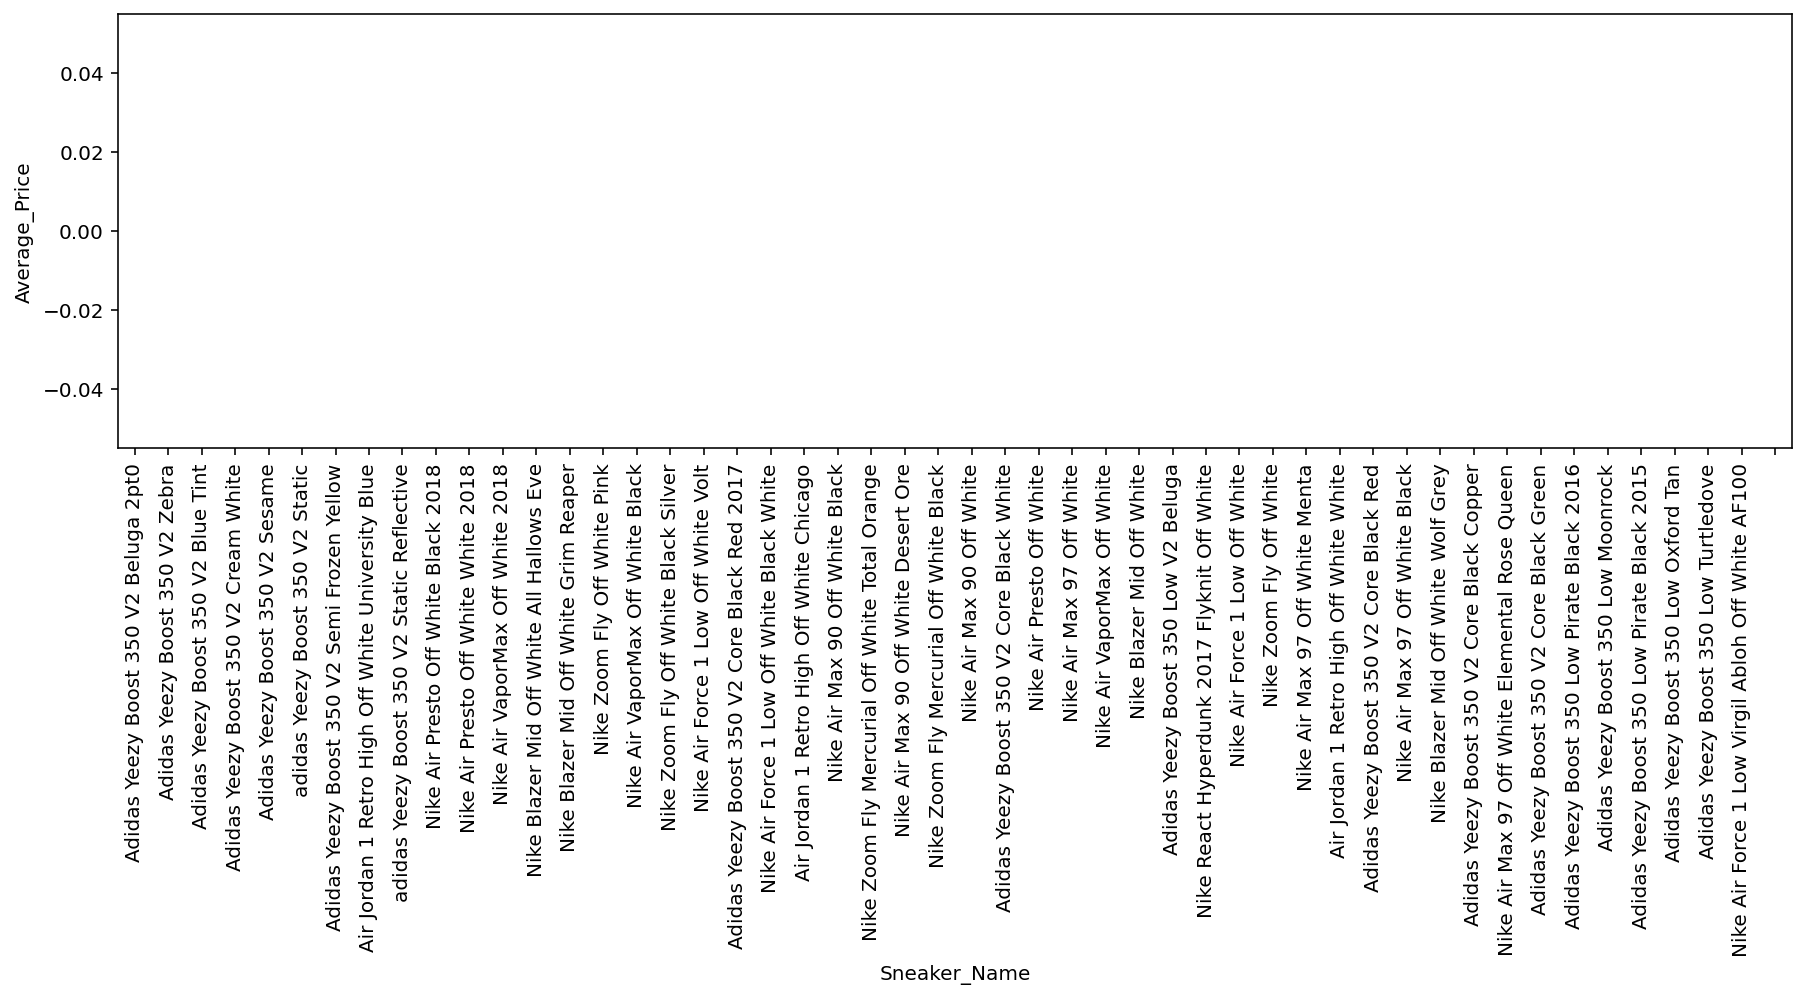

In [61]:
fig_dims = (15,4)
fig,ax = plt.subplots(figsize = fig_dims)
chart = sns.barplot(x = avgprice_df['Sneaker_Name'], y=avgprice_df['Average_Price'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

## 브랜드 평균 가격

In [62]:
avgs_price2 =[]
target_df = df[['Brand','Sale Price']]
brands = ['Adidas','Nike','Jordan']

for brands_index in range(len(brands)):
  brandrow = target_df.loc[target_df['Brand'] == str(brands[brands_index])]
  avgs_price2.append(brandrow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{brands[i]} average price : $' + str(avgs_price2[i]))

Adidas average price : $353.28518443687585
Nike average price : $548.177461848188
Jordan average price : $802.3665137614679


In [63]:
target_df.head()

,Brand,Sale Price
0,Adidas,685
1,Adidas,690
2,Adidas,828
3,Adidas,798
4,Adidas,784


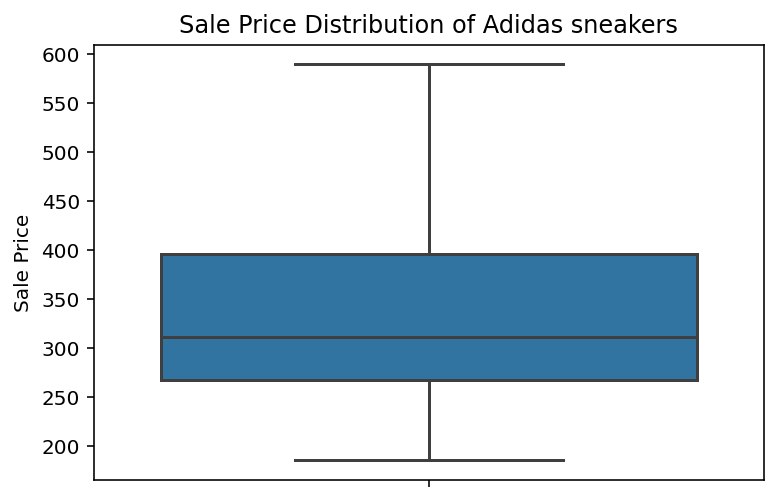

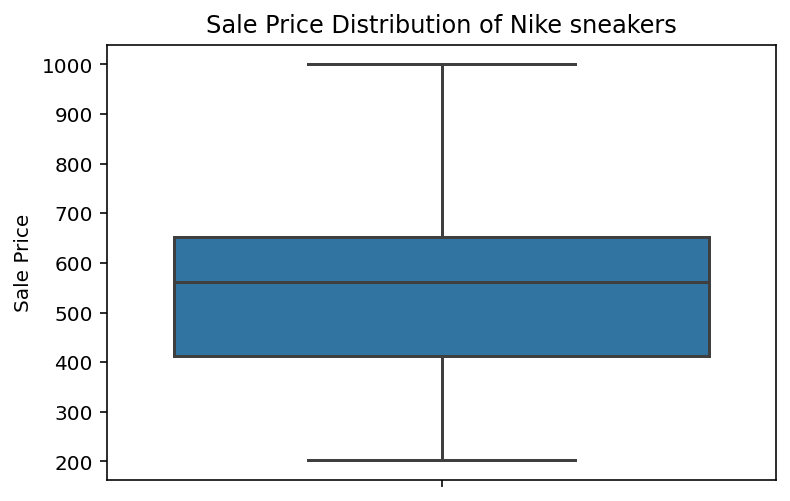

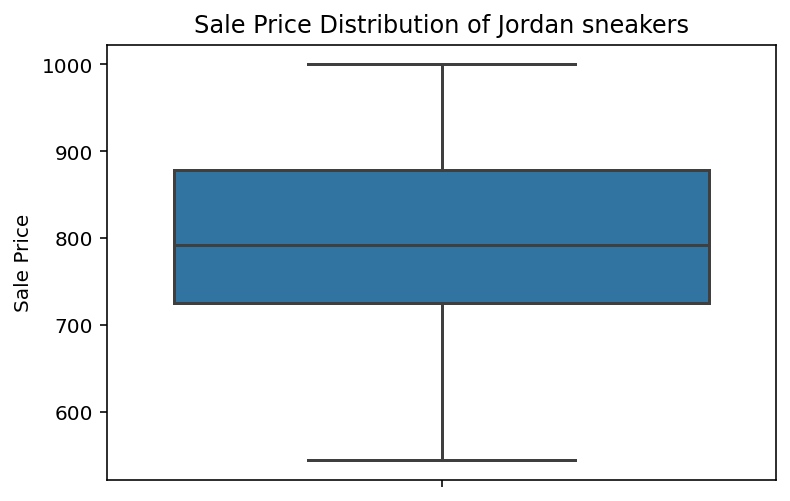

In [64]:
for brand in brands:
  brandrow = target_df.loc[target_df['Brand']==brand]
  chart = sns.boxplot(y=brandrow['Sale Price'],showfliers = False) # 이상치 안보여줌
  chart.set_title("Sale Price Distribution of %s sneakers" % (brand))
  plt.show()
  

## 트랜드 분석 : 판매가와 주문일

In [65]:
target_df = df[['Order Date', 'Sale Price']]
# ndarray 형태의 unique 를 list형태로
uniq_ord_dates = df['Order Date'].value_counts().index.tolist()
avgs_price3 = []

for date in uniq_ord_dates:
  daterow = target_df[target_df['Order Date']==str(date)]
  avgs_price3.append(daterow['Sale Price'].mean())
  
uniq_dates = pd.Series(uniq_ord_dates)
date_avgs = pd.Series(avgs_price3)
dateprice_df = pd.DataFrame(columns=['Order_date', 'Average_Price'])
dateprice_df['Order_date'] = uniq_dates.sort_values(ascending=True)
dateprice_df['Average_Price']=date_avgs
dateprice_df.head()


,Order_date,Average_Price
474,2017-09-01,611.761905
496,2017-09-02,649.600000
503,2017-09-03,614.000000
490,2017-09-04,623.764706
473,2017-09-05,624.333333


Text(0.5, 1.0, 'Average Daily Sale Price Over time')

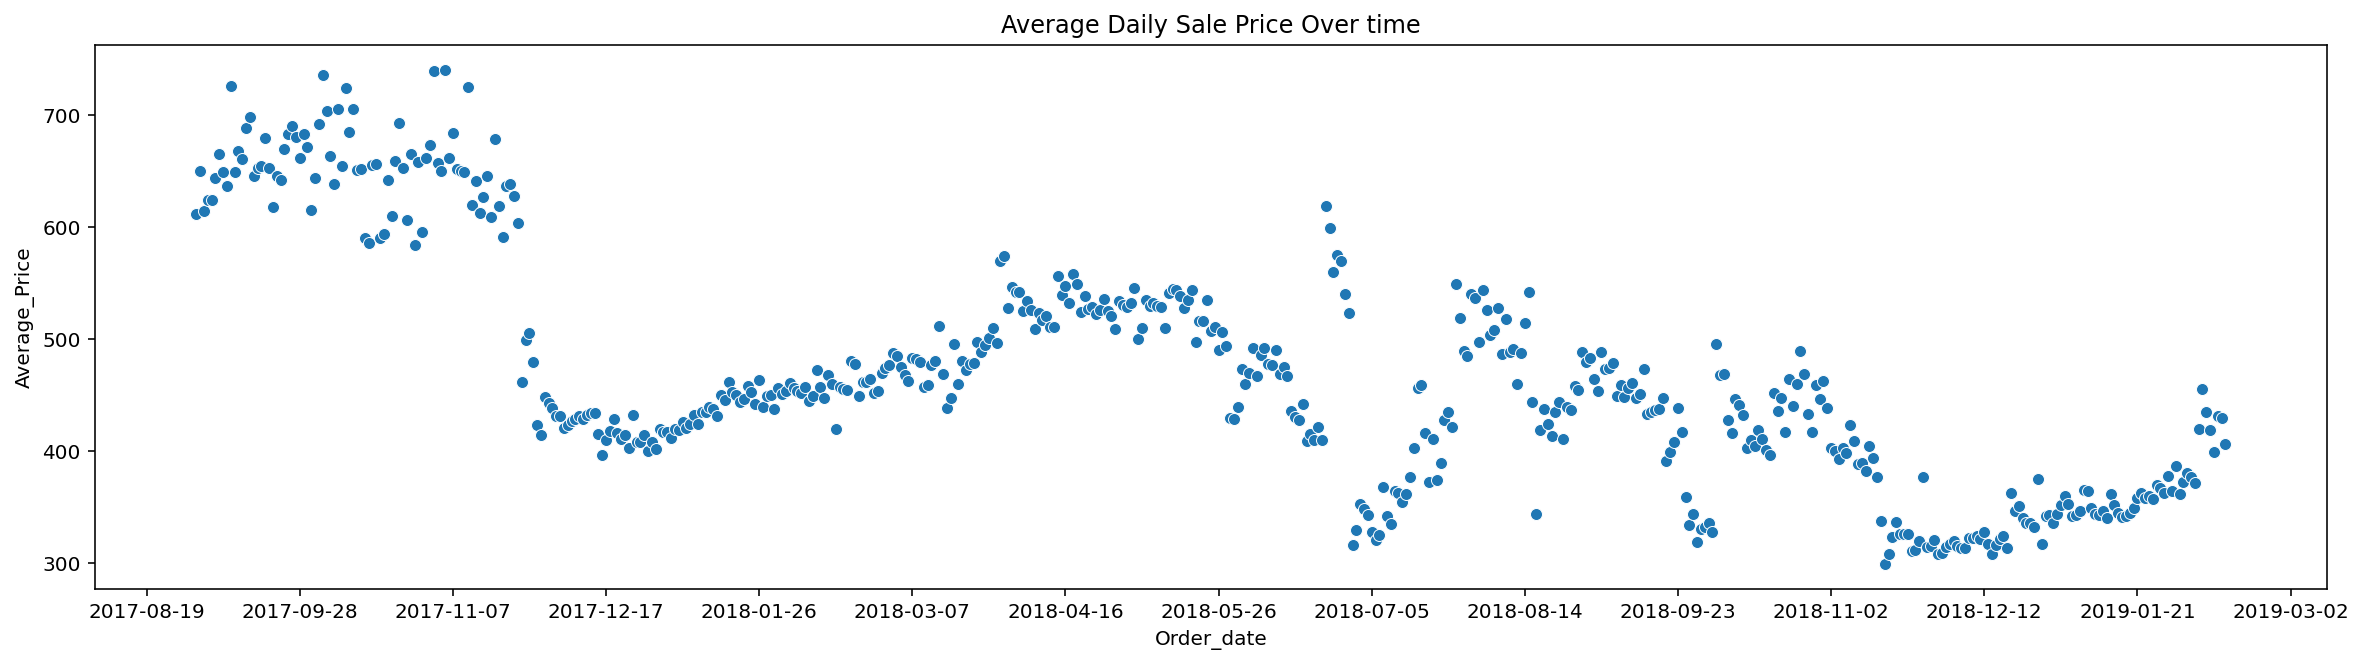

In [66]:
# 주문일 기준 시간에 따른 평균가격 변화 

fig_dims = (20,5)
fig,ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Order_date",y="Average_Price",data=dateprice_df)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(40))
chart.set_title("Average Daily Sale Price Over time")

33


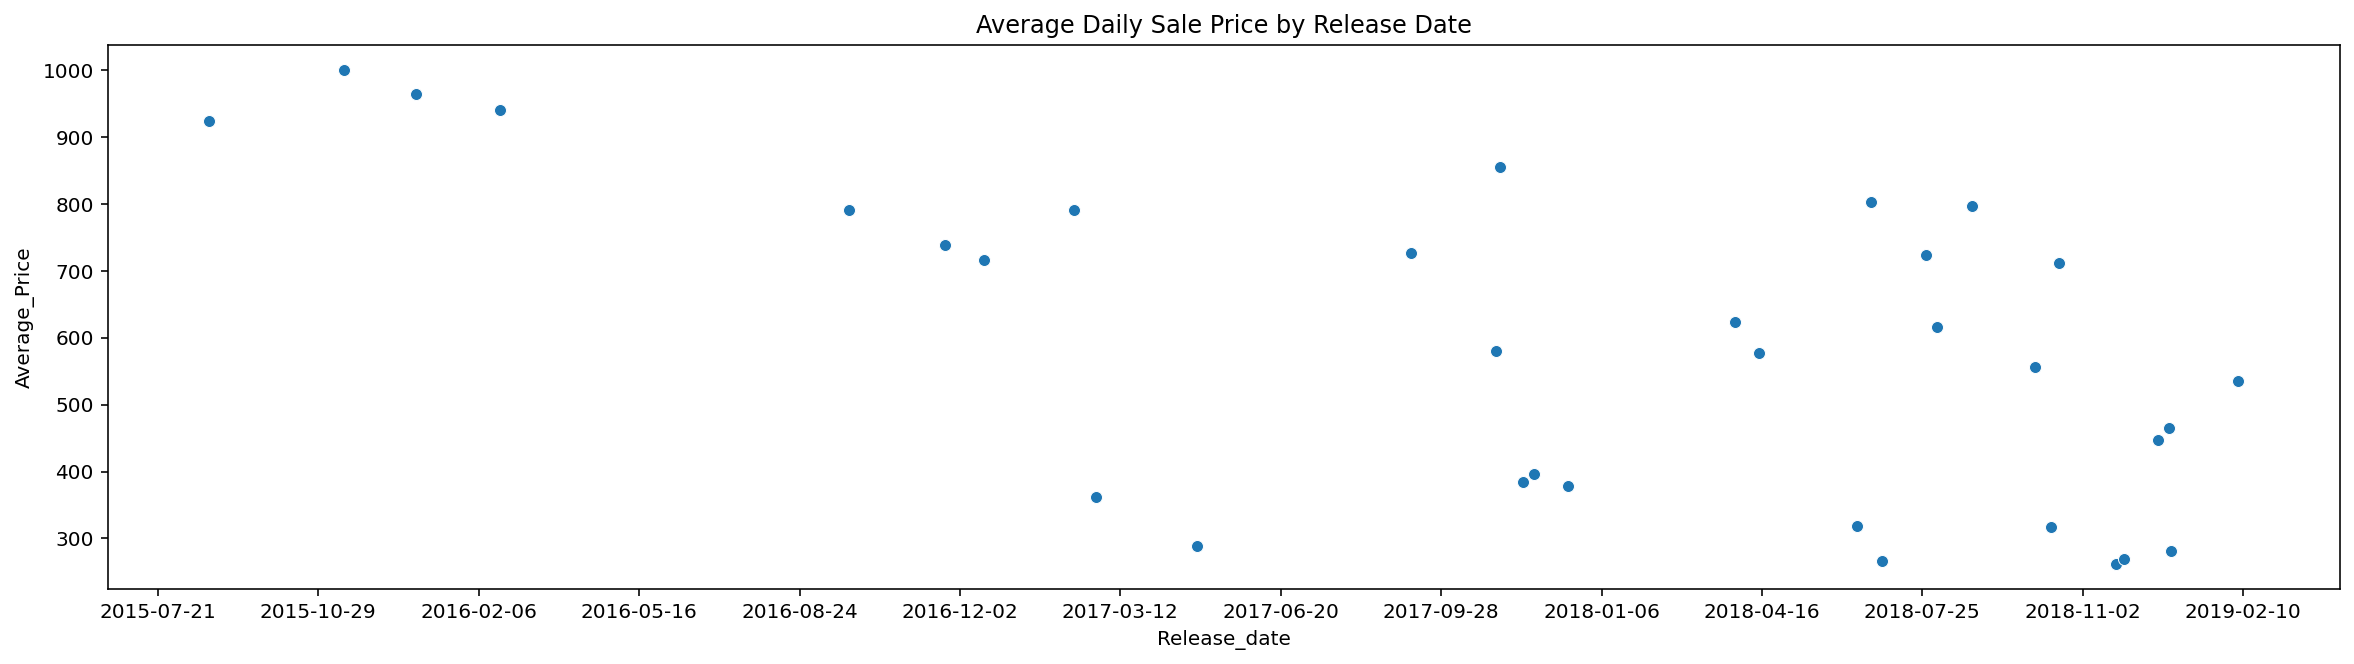

In [67]:
# 출시일 기준 시간에 따른 평균가격 변화 (확인 결과 출시일 고유값이 35개 뿐임)

target_df = df[['Release Date','Sale Price']]
uniq_rel = target_df['Release Date'].unique()
avgprice=[]

for uni in uniq_rel:
  daterow = target_df.loc[target_df['Release Date']== uni]
  avgprice.append(daterow['Sale Price'].mean())

Date = pd.Series(uniq_rel)
avgPrice = pd.Series(avgprice)
print(len(avgPrice))
rel_dateprice_df = pd.DataFrame(columns=['Release_date','Average_Price'])
rel_dateprice_df['Release_date'] = Date.sort_values(ascending=True)
rel_dateprice_df['Average_Price'] = avgPrice

fig_dims = (20,5)
fig,ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Release_date",y="Average_Price",data=rel_dateprice_df)
chart.set_title("Average Daily Sale Price by Release Date")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))

## 트랜드 분석 : 구매자 지역과 판매 가격 비교

In [68]:
target_df = df[['Buyer Region','Sale Price']]
uniq_region = df['Buyer Region'].value_counts().index.tolist()
avg_price = []

for region in uniq_region:
  region_row = target_df.loc[target_df['Buyer Region']==region]
  avg_price.append(region_row['Sale Price'].mean())

region_col = pd.Series(uniq_region)
avgprice_col = pd.Series(avg_price)

regionprice_df = pd.DataFrame(columns=['Buyer Region','Average Price'])
regionprice_df['Buyer Region'] = region_col
regionprice_df['Average Price'] = avgprice_col
regionprice_df.head().sort_values('Average Price',ascending=True)

,Buyer Region,Average Price
4,Texas,387.705549
3,Florida,401.120249
1,New York,405.364914
0,California,426.044155
2,Oregon,429.603267


Text(0.5, 1.0, 'Average Sale Price by Buyer Region')

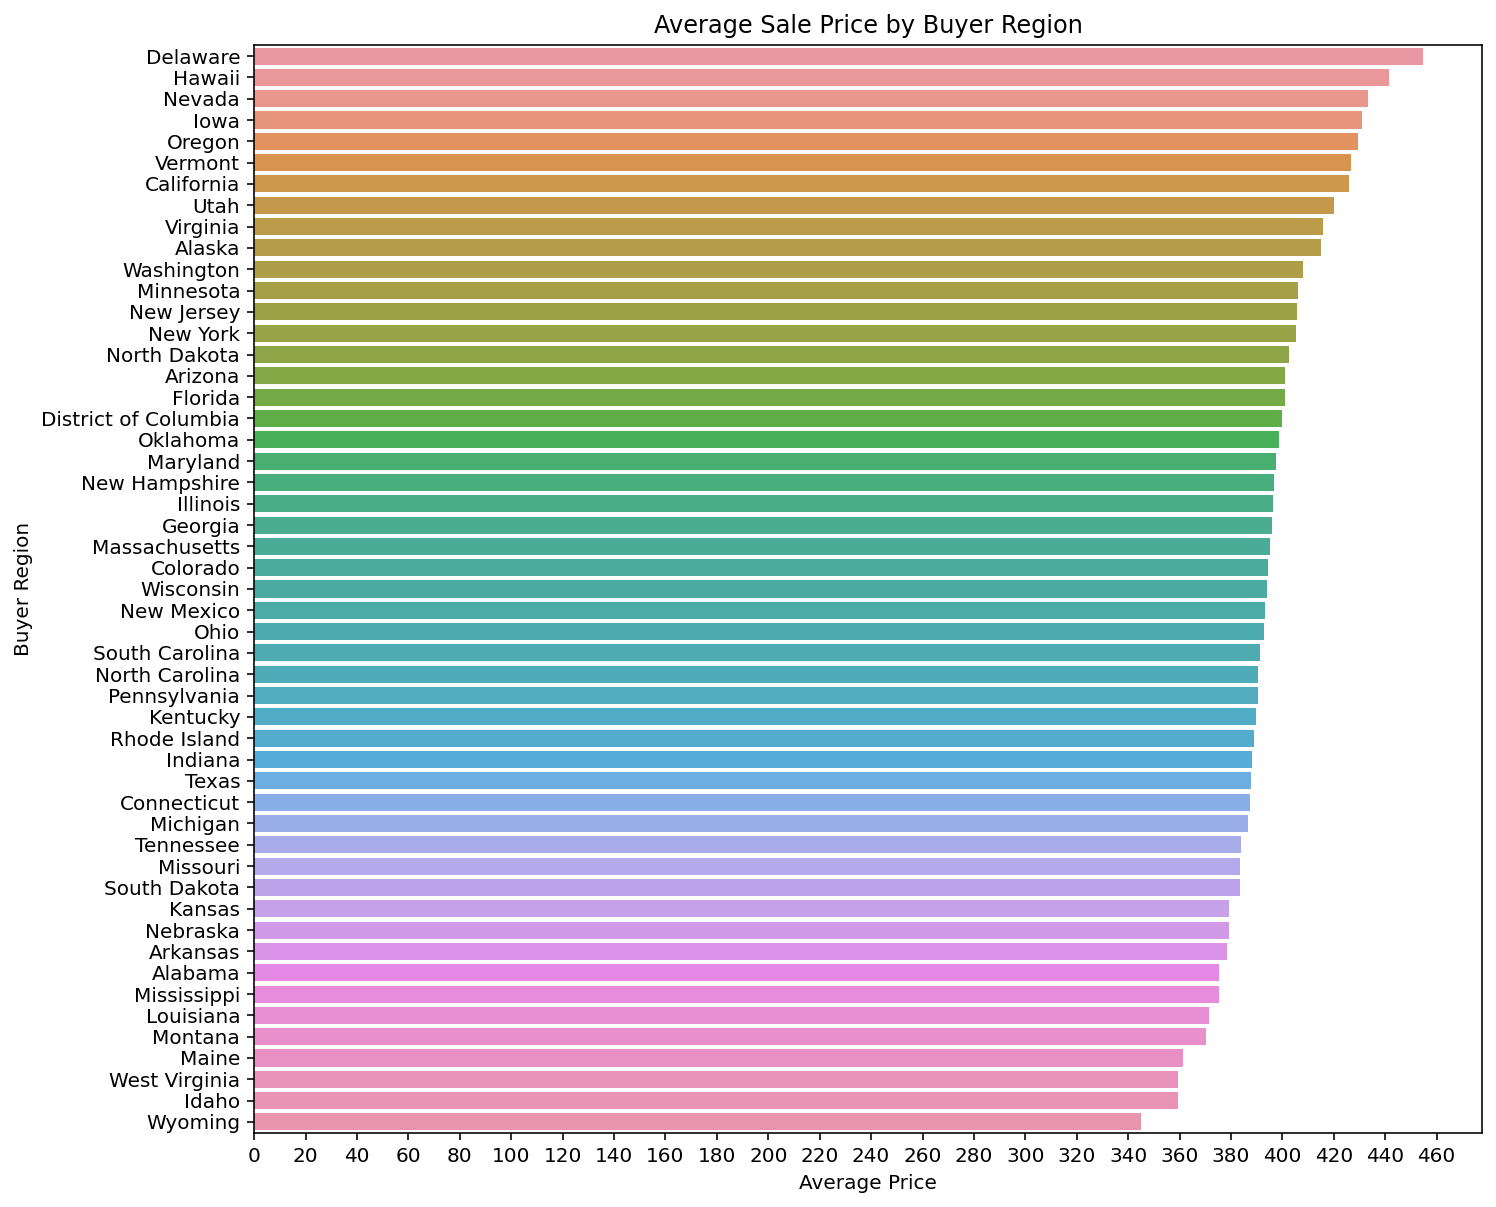

In [69]:
fig,ax = plt.subplots(figsize=(11,10))
chart = sns.barplot(x='Average Price',y='Buyer Region',data=regionprice_df.sort_values('Average Price',ascending=False))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20))
chart.set_title("Average Sale Price by Buyer Region")

# Modeling
* 상품의 평균 가격 예측 
* train 데이터(df)의 브랜드, 신발 이름, (주문일-출시일), 소매가 => 판매가 예측 학습
* test 데이터(test_df2) 의 브랜드, 신발 이름, (현재날짜 - 출시일), 소매가 [입력] => 평균신발가격과 비슷한지 성능 평가

In [70]:
# 테스트 데이터 컬럼 필요한것만 남기는 작업
test2 = test.copy()
test2.drop(columns=['Unnamed: 0'],inplace=True)
test2.columns=['Sneaker_Name','Brand','retail Price','Release Date','가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','연간가장낮은가격','최근12개월간가격변동률','팔린신발수','평균신발가격','최근 판매가','최근가격변동률']
test_df = test2.drop(columns=['가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','팔린신발수','연간가장낮은가격','최근12개월간가격변동률','최근가격변동률'])
# 여기서 최근 판매가는 변동성이 너무 커서 우리의 머신러닝 모델로 예측하는 가격은 평균신발가격으로 설정하는게 좋을 것같아서 최근 판매가 컬럼도 삭제하겠습니다.
test_df2 = test_df.drop('최근 판매가',axis=1)
test_df2.head()

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격
0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,188
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566
4,adidas Yeezy Boost 700 Hi-Res Red,adidas,300,2022-06-17,354


In [71]:
df.head(1)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return
0,2017-09-01,Adidas,Adidas Yeezy Boost,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.1


In [72]:
train_df = df.copy()
test_df = test_df2.copy()

## 머신러닝 모델링을 위한 전처리

In [73]:
train_df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point', 'multiple_return'],
      dtype='object')

In [74]:
test_df.columns

Index(['Sneaker_Name', 'Brand', 'retail Price', 'Release Date', '평균신발가격'], dtype='object')

### 컬럼명 변경

In [75]:
# 컬럼명 공백 제거

train_df = train_df.rename(columns={
    "Order Date":"Order_date",
    "Sneaker Name": "Sneaker_Name",
    "Sale Price": "Sale_Price",
    "Retail Price": "Retail_Price",
    "Release Date": "Release_Date",
    "Shoe Size": "Shoe_Size",
    "Buyer Region": "Buyer_Region", 
    'Cheaper Buy': 'Cheaper_Buy',
    'Same Buy':'Same_Buy',
    'Expensive Buy':'Expensive_Buy',
    'time gap':'time_gap',
    'cardinal point':'cardinal_point'
    })
train_df.head(1)

,Order_date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Cheaper_Buy,Same_Buy,Expensive_Buy,time_gap,cardinal_point,multiple_return
0,2017-09-01,Adidas,Adidas Yeezy Boost,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.1


In [76]:
test_df = test_df.rename(columns={
    'retail Price':'Retail_Price',
    'Release Date':'Release_Date',
    '평균신발가격':'Average_Price'
})
test_df.head(1)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price
0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,188


In [77]:
test_df['Brand'] = test_df['Brand'].str.replace('adidas', 'Adidas')
test_df['Brand'].unique()

array(['Adidas', 'Jordan', 'Nike', 'New Balance', 'Crocs', 'Puma',
       'Converse', 'Common Projects', 'Vans', 'Asics', 'Hoka One One',
       'OFF-WHITE', 'The North Face', 'Alexander McQueen', 'Under Armour',
       'BAPE'], dtype=object)

In [78]:
# 날짜 데이터 -> 수치형 데이터 전환
import datetime as dt

train_df['Order_date'] = pd.to_datetime(train_df['Order_date'])
train_df['Order_date']=train_df['Order_date'].map(dt.datetime.toordinal)

train_df['Release_Date'] = pd.to_datetime(train_df['Release_Date'])
train_df['Release_Date']=train_df['Release_Date'].map(dt.datetime.toordinal)

train_df['time_gap']=train_df['Order_date']-train_df['Release_Date']

In [79]:
# 데이터 수집일자 컬럼 추가
Crowling_Data = ['2022-06-15']*len(test_df)
test_df['Crowling_Data']=Crowling_Data
test_df['Crowling_Data'] = pd.to_datetime(test_df['Crowling_Data'],format='%Y-%m-%d')
test_df.dtypes

Sneaker_Name             object
Brand                    object
Retail_Price              int64
Release_Date             object
Average_Price             int64
Crowling_Data    datetime64[ns]
dtype: object

In [80]:
test_df['Release_Date'] = pd.to_datetime(test_df['Release_Date'])
test_df['Release_Date']=test_df['Release_Date'].map(dt.datetime.toordinal)

test_df['Crowling_Data']=test_df['Crowling_Data'].map(dt.datetime.toordinal)


# 수집일 - 출시일 = time gap 컬럼 생성
test_df['time_gap']=test_df['Crowling_Data']-test_df['Release_Date']
test_df.head(2)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price,Crowling_Data,time_gap
0,adidas Yeezy Foam RNR Onyx,Adidas,80,738314,188,738321,7
1,Jordan 1 Retro High OG Visionaire,Jordan,170,738317,209,738321,4


### Target Feature 등 컬럼 제거 후 train/test set 분리

In [81]:
train_df.head(1)

,Order_date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Cheaper_Buy,Same_Buy,Expensive_Buy,time_gap,cardinal_point,multiple_return
0,736573,Adidas,Adidas Yeezy Boost,685,220,736291,11.0,California,False,False,True,282,West,3.1


In [82]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics

X = train_df.drop(['Sale_Price','Cheaper_Buy','Same_Buy','Expensive_Buy','cardinal_point','Buyer_Region','Shoe_Size','multiple_return'],axis=1)
y = train_df['Sale_Price']


X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)


In [83]:
print(X.shape)

(91589, 6)


In [84]:
# 신발 이름에서 공백을 기준으로 split한 컬럼들을 인코딩하면 모델 성능이 올라가지않을까?
X['Sneaker_Name']

0        Adidas Yeezy Boost
1        Adidas Yeezy Boost
2        Adidas Yeezy Boost
3        Adidas Yeezy Boost
4        Adidas Yeezy Boost
                ...        
91584          Air Jordan 1
91585          Air Jordan 1
91586          Air Jordan 1
91587          Air Jordan 1
91588          Air Jordan 1
Name: Sneaker_Name, Length: 91589, dtype: object

In [85]:
test_df['Sneaker_Name']

0                             adidas Yeezy Foam RNR Onyx
1                      Jordan 1 Retro High OG Visionaire
2                                Jordan 4 Retro Infrared
3               NikeCraft General Purpose Shoe Tom Sachs
4                      adidas Yeezy Boost 700 Hi-Res Red
                             ...                        
995    Nike Air Force 1 Low G-Dragon Peaceminusone Pa...
996              Jordan 1 Retro High Black Satin Gym Red
997                 Nike Air Max 90 Recraft Triple White
998                       adidas Yeezy Boost 350 V2 Fade
999          Nike SB Dunk High Supreme By Any Means Navy
Name: Sneaker_Name, Length: 1000, dtype: object

In [86]:
test_df.head(1)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price,Crowling_Data,time_gap
0,adidas Yeezy Foam RNR Onyx,Adidas,80,738314,188,738321,7


In [87]:
X_test = test_df.drop('Average_Price',axis=1)
y_test = test_df['Average_Price']

In [88]:
X_test.columns

Index(['Sneaker_Name', 'Brand', 'Retail_Price', 'Release_Date',
       'Crowling_Data', 'time_gap'],
      dtype='object')

### Encoding

In [89]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.3 MB/s 


In [90]:
# ## import OneHotEncoder
# from category_encoders import OneHotEncoder

# ## 원핫 인코딩
# encoder = OneHotEncoder(use_cat_names = True)
# OH_X_train = encoder.fit_transform(X_train)
# OH_X_valid = encoder.transform(X_val)
# OH_X_test = encoder.transform(X_test)

In [91]:
# 범주형 데이터 -> 수치형 데이터

from sklearn.preprocessing import OneHotEncoder

object_cols = ['Sneaker_Name','Brand'] 


# 범주형 데이터를 가진 컬럼에 원핫인코딩 적용
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))

OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# 원핫인코딩 인덱스 제거 -> 인덱스 치환
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index

OH_cols_test.index = X_test.index

# 원핫 인코딩 후 컬럼명 추가
OH_cols_train.columns = OH_encoder.get_feature_names(object_cols)
OH_cols_valid.columns = OH_encoder.get_feature_names(object_cols)

OH_cols_test.columns = OH_encoder.get_feature_names(object_cols)

# train, validation 데이터셋에서 원핫인코딩한 컬럼들 삭제(수치형 Feature들만 존재)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_val.drop(object_cols, axis=1)

num_X_test = X_test.drop(object_cols, axis=1)

# 원핫인코딩한 결과 병합
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [92]:
OH_X_train.head(2)

,Order_date,Retail_Price,Release_Date,time_gap,Sneaker_Name_Adidas Yeezy Boost,Sneaker_Name_Air Jordan 1,Sneaker_Name_Nike Air Force,Sneaker_Name_Nike Air Max,Sneaker_Name_Nike Air Presto,Sneaker_Name_Nike Air VaporMax,Sneaker_Name_Nike Blazer Mid,Sneaker_Name_Nike React Hyperdunk,Sneaker_Name_Nike Zoom Fly,Brand_Adidas,Brand_Jordan,Brand_Nike
15643,736728,220,736679,49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
70425,737053,170,737047,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 모델 적용

### Baseline - Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(OH_X_train,y_train)

LinearRegression()

In [94]:
# y절편 확인

print(lm.intercept_)

314578.03701850015


In [95]:
# 상관계수 확인

coeff_df = pd.DataFrame(lm.coef_,OH_X_train.columns,columns=['Coefficient'])
ranked_coeff = coeff_df.sort_values("Coefficient",ascending=True)
ranked_coeff

,Coefficient
Order_date,-1.788490e+08
Sneaker_Name_Adidas Yeezy Boost,-2.195181e+02
Sneaker_Name_Nike Zoom Fly,-1.566772e+02
Sneaker_Name_Nike React Hyperdunk,-9.723017e+01
Brand_Nike,-2.630147e+01
Retail_Price,1.938546e-01
Brand_Adidas,1.119303e+01
Sneaker_Name_Nike Air Force,1.613940e+01
Sneaker_Name_Nike Air VaporMax,7.018280e+01
Brand_Jordan,9.121302e+01


In [96]:
# 예측값 저장, 평가 지표 적용

pred = lm.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,pred))
print("MSE :",metrics.mean_squared_error(y_val,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,pred)))

MAE : 76.27874738014748
MSE : 11724.473924655886
RMSE : 108.27960992105524


In [97]:
# Test 데이터로 실제 테스트

pred = lm.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE : 141194284486555.06
MSE : 2.1054904241133924e+28
RMSE : 145103081432249.12


### Model1

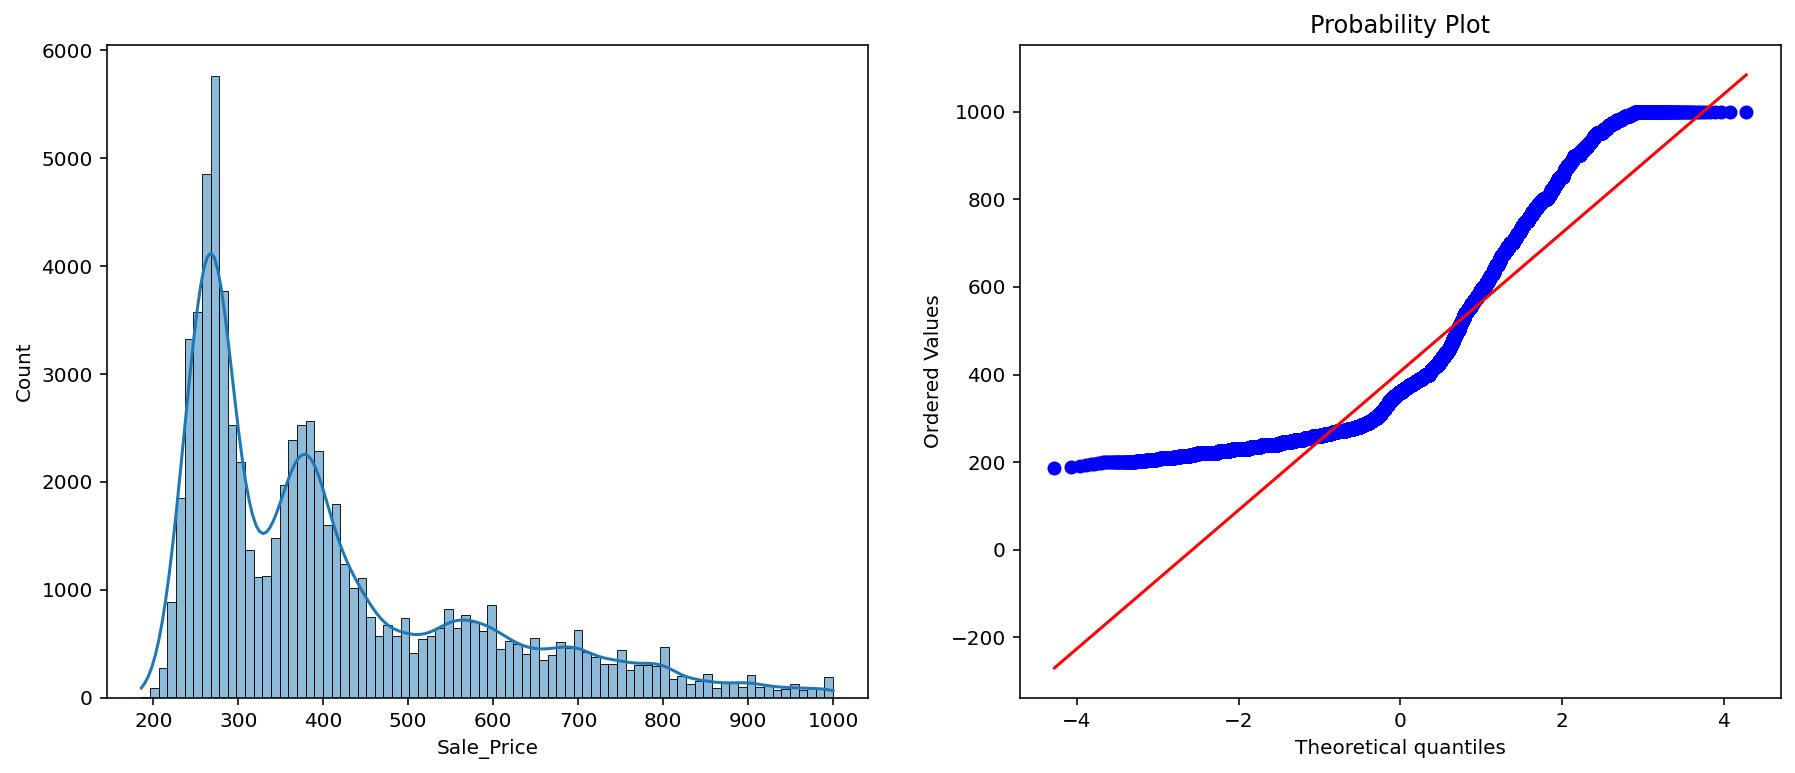

In [98]:
from scipy import stats

fig, axs = plt.subplots(1,2, figsize = (15,6))

sns.histplot(y_train, ax =axs[0], kde=True)
stats.probplot(y_train, dist='norm', fit=True, plot=axs[1])

plt.show()

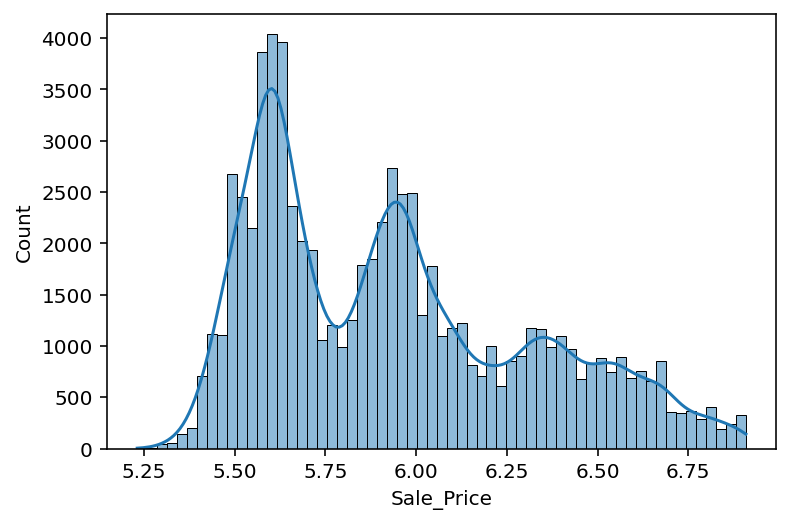

In [99]:
sns.histplot(np.log1p(y_train), kde=True)
plt.show()

####Ridge
- 릿지 회귀는 L2-Norm을 사용한 회귀
- 일반적으로 영향을 거의 미치지 않는 특성에 대하여 0에 가까운 가중치

In [100]:
# SelectKBest 사용하여 Ridge 모델
from sklearn.feature_selection import f_regression, SelectKBest

#f_regression을 사용하여 점수를 기반으로 중요도를 평가
selector = SelectKBest(score_func=f_regression, k = 5)

#학습데이터
X_train_selected = selector.fit_transform(OH_X_train, y_train)

#테스트데이터
X_test_selected = selector.transform(OH_X_test)

X_train_selected.shape, X_test_selected.shape

((73271, 5), (1000, 5))

In [101]:
all_names = OH_X_train.columns

selected_mask = selector.get_support()

# 선택된 특성들
selected_names = all_names[selected_mask]
selected_names

Index(['Retail_Price', 'Sneaker_Name_Adidas Yeezy Boost', 'Brand_Adidas',
       'Brand_Jordan', 'Brand_Nike'],
      dtype='object')

In [102]:
import numpy as np

# selctor에서 점수 추출 (배열)
score = selector.scores_

# 가장 높은 점수의 인덱스 번호 추출
best_score_index = np.argmax(score)

# 학습 데이터셋 컬럼에서 인덱스번호에 해당하는 컬럼 이름 확인
all_names[best_score_index]

'Sneaker_Name_Adidas Yeezy Boost'

In [103]:
from sklearn.linear_model import RidgeCV

alphas = [0, 0.001, 0.01, 0.1, 1]

ridge = RidgeCV(alphas = alphas, normalize=True, cv=5)
ridge.fit(X_train_selected, y_train)

RidgeCV(alphas=array([0.   , 0.001, 0.01 , 0.1  , 1.   ]), cv=5, normalize=True)

In [104]:
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.0
best score:  0.35253745637986034


In [105]:
y_pred = ridge.predict(X_test_selected)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 10035741703894.7
MSE : 7.450741056845526e+26
RMSE : 27296045605262.176
r2_score : -3.6157945614206667e+22


In [106]:
OH_X_train.columns

Index(['Order_date', 'Retail_Price', 'Release_Date', 'time_gap',
       'Sneaker_Name_Adidas Yeezy Boost', 'Sneaker_Name_Air Jordan 1',
       'Sneaker_Name_Nike Air Force', 'Sneaker_Name_Nike Air Max',
       'Sneaker_Name_Nike Air Presto', 'Sneaker_Name_Nike Air VaporMax',
       'Sneaker_Name_Nike Blazer Mid', 'Sneaker_Name_Nike React Hyperdunk',
       'Sneaker_Name_Nike Zoom Fly', 'Brand_Adidas', 'Brand_Jordan',
       'Brand_Nike'],
      dtype='object')

In [107]:
# 특성 모두 사용
from sklearn.linear_model import RidgeCV

alphas = [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000.0]

ridge = RidgeCV(alphas = alphas, normalize=True, cv=5)
ridge.fit(OH_X_train, y_train)

RidgeCV(alphas=array([1.e-03, 5.e-03, 1.e-02, 2.e-02, 3.e-02, 1.e-01, 1.e+00, 1.e+00,
       1.e+02, 1.e+03]),
        cv=5, normalize=True)

In [108]:
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.001
best score:  0.5923215640517778


In [109]:
y_pred = ridge.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,y_pred))
print("MSE :",metrics.mean_squared_error(y_val,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,y_pred)))
print("r2_score :", metrics.r2_score(y_val, y_pred))

MAE : 76.27848549972602
MSE : 11724.376984519551
RMSE : 108.27916228212865
r2_score : 0.590727743969214


In [110]:
y_pred = ridge.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 327971.53877636127
MSE : 108324980234.36438
RMSE : 329127.6047893345
r2_score : -5256937.4898640495


####Lasso 
- 선형 회귀에 규제를 적용한 다른 모델 (L1 규제)
- L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거
- L1 규제는 적절한 feature만 회귀에 포함시키는 feature 선택의 특성

In [111]:
from sklearn.linear_model import LassoCV

alphas = [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000.0]

lasso = LassoCV(alphas = alphas, normalize=True, cv=5)
lasso.fit(OH_X_train, y_train)

LassoCV(alphas=[0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000.0],
        cv=5, normalize=True)

In [112]:
print("alpha: ", lasso.alpha_)
print("lasso score: ", lasso.score(OH_X_train, y_train))

alpha:  0.001
lasso score:  0.5924860491792918


In [113]:
print("training set score: {:.2f}".format(lasso.score(OH_X_train, y_train))) # 훈련 데이터 결정계수
print("test set score: {:.2f}".format(lasso.score(OH_X_valid, y_val))) # 검증 데이터 결정계수
print("test set score: {:.2f}".format(lasso.score(OH_X_test, y_test))) # 테스트 데이터 결정계수
print("the number of the used features: {}".format(np.sum(lasso.coef_ != 0))) # 사용된 특성갯수

usedfeatures = np.nonzero(lasso.coef_ != 0)
print("numbers of the used features: ", usedfeatures[0])# 사용된 특성 번호

training set score: 0.59
test set score: 0.59
test set score: -2465024.50
the number of the used features: 11
numbers of the used features:  [ 0  2  4  5  6  7  8 10 11 12 13]


In [114]:
y_pred = lasso.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,y_pred))
print("MSE :",metrics.mean_squared_error(y_val,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,y_pred)))
print("r2_score :", metrics.r2_score(y_val, y_pred))

MAE : 76.29642324865308
MSE : 11724.773762405508
RMSE : 108.28099446535163
r2_score : 0.590713893324464


In [115]:
y_pred = lasso.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 225376.41739849676
MSE : 50794552537.70352
RMSE : 225376.4684648855
r2_score : -2465024.4976567836


In [116]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 회귀 트리 모델
rf_reg = RandomForestRegressor(n_estimators=500)
gb_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

In [117]:
rf_reg.fit(OH_X_train, y_train)
gb_reg.fit(OH_X_train, y_train)
xgb_reg.fit(OH_X_train, y_train)
lgbm_reg.fit(OH_X_train, y_train)

[04:06:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(n_estimators=500)

In [118]:
y_pred = rf_reg.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 533.1250724691226
MSE : 299812.51806234685
RMSE : 547.5513839470656
r2_score : -13.549700009499936


In [119]:
y_pred = gb_reg.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 492.251661859661
MSE : 257675.033170168
RMSE : 507.61701426387197
r2_score : -11.50479618660971


In [120]:
y_pred = xgb_reg.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,y_pred))
print("MSE :",metrics.mean_squared_error(y_val,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,y_pred)))
print("r2_score :", metrics.r2_score(y_val, y_pred))

MAE : 26.714550800908665
MSE : 1778.9528829839414
RMSE : 42.17763486711816
r2_score : 0.937900661096736


In [121]:
y_pred = lgbm_reg.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 531.9280243150937
MSE : 293379.92384930124
RMSE : 541.6455703218676
r2_score : -13.23753053543149


### Model2

####랜덤포레스트
- 다양성을 극대화 하여 예측력이 우수한 편
- 다수의 트리 예측 결과를 종합하여 의사결정을 진행하기 때문에 안정성도 높음
- 랜덤 포레스트 알고리즘은 입력 데이터 범위가 다양하고 상황이 복잡한 시나리오에서 사용할 수 있다.



In [122]:
OH_X_train.drop(columns = ['Release_Date'], inplace = True)

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline

# pipe = make_pipeline(
#     TargetEncoder(), 
#     SimpleImputer(), 
#     RandomForestRegressor(random_state=2)
# )

pipe = make_pipeline(
    RandomForestRegressor(random_state=42)
)
#rf_reg = RandomForestRegressor(random_state=42)

dists = {
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [2, 4, 6, None], 
    'randomforestregressor__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter = 50, 
    cv = 3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

model = clf.fit(OH_X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [125]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 0.7600948953690437, 'randomforestregressor__n_estimators': 490}
MAE:  27.315536876465625


In [126]:
# 각 하이퍼파라미터 조합으로 만들어진 모델 순위
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,28,45,37,22,9,14,27,44,49,0,...,21,33,31,46,42,7,35,36,16,12
mean_fit_time,42.616263,40.549355,40.73959,35.276732,31.067321,10.632253,4.043922,15.978399,27.78021,17.253913,...,3.778528,4.411733,2.375642,3.395174,2.213455,6.670854,2.790881,2.121346,0.846149,1.937343
std_fit_time,0.051688,0.361981,1.101572,0.164219,0.644983,0.061195,0.03126,0.12292,5.703362,1.883289,...,0.016577,0.019319,0.036117,0.016432,0.019426,0.066305,0.013654,0.034306,0.021774,0.017156
mean_score_time,3.249025,3.061468,2.89266,2.495428,2.093253,0.818298,0.327536,1.597777,3.046789,1.478874,...,0.15832,0.429112,0.224519,0.188847,0.140505,0.443187,0.215634,0.169195,0.072165,0.175686
std_score_time,0.013665,0.021261,0.027048,0.023143,0.019549,0.028807,0.003071,0.021667,0.397581,0.015305,...,0.001182,0.018096,0.005397,0.002203,0.001312,0.005902,0.000759,0.002634,0.004024,0.000616
param_randomforestregressor__max_depth,None,None,None,None,None,None,None,None,None,None,...,2,4,4,2,2,2,2,2,2,2
param_randomforestregressor__max_features,0.760095,0.743506,0.81494,0.922917,0.9248,0.741279,0.625175,0.31405,0.227203,0.319985,...,0.990539,0.117415,0.002244,0.661284,0.533102,0.402154,0.281648,0.319199,0.333317,0.215676
param_randomforestregressor__n_estimators,490,467,431,376,315,124,50,241,493,222,...,162,355,189,200,150,491,248,186,74,196
params,"{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...",...,"{'randomforestregressor__max_depth': 2, 'rando...","{'randomforestregressor__max_depth': 4, 'rando...","{'randomforestregressor__max_depth': 4, 'rando...","{'randomforestregressor__max_depth': 2, 'rando...","{'randomforestregressor__max_depth': 2, 'rando...","{'randomforestregressor__max_depth': 2, 'rando...","{'randomforestregressor__max_depth': 2, 'rando...","{'randomforestregressor__max_depth': 2, 'rando...","{'randomforestregressor__max_depth': 2, 'rando...","{'randomforestregressor__max_depth': 2, 'rando..."
split0_test_score,-26.980488,-26.980974,-26.980101,-26.983283,-26.99052,-27.025915,-27.0239,-27.075295,-27.076481,-27.077696,...,-81.033998,-81.725508,-81.993136,-81.948633,-84.077048,-85.880487,-90.119474,-90.418203,-90.447248,-90.773101
split1_test_score,-27.411829,-27.41279,-27.409885,-27.418203,-27.411538,-27.420618,-27.498696,-27.507914,-27.496172,-27.507738,...,-82.278465,-82.780451,-83.093036,-83.138069,-85.239309,-87.054019,-91.406536,-91.735529,-91.719774,-92.053641


In [127]:
OH_X_valid.drop(columns = ['Release_Date'], inplace = True)
OH_X_test.drop(columns = ['Release_Date'], inplace = True)

In [129]:
# 만들어진 모델에서 가장 성능이 좋은 모델
pipe = clf.best_estimator_

#검증, 테스트 데이터
from sklearn import metrics

y_pred = pipe.predict(OH_X_valid)
mae = metrics.mean_absolute_error(y_val, y_pred)
mse = metrics.mean_squared_error(y_val,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_val,y_pred))
r2_score = metrics.r2_score(y_val, y_pred)
print(f'검증데이터 MAE: {mae:,.2f}')
print(f'검증데이터 MSE: {mse:,.2f}')
print(f'검증데이터 RMSE: {rmse:,.2f}')
print(f'검증데이터 R2_score: {r2_score:,.2f}')

y_pred = pipe.predict(OH_X_test)
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_mse = metrics.mean_squared_error(y_test,y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
test_r2_score = metrics.r2_score(y_test, y_pred)
print(f'테스트데이터 MAE: {test_mae:,.2f}')
print(f'테스트데이터 MSE: {test_mse:,.2f}')
print(f'테스트데이터 RMSE: {test_rmse:,.2f}')
print(f'테스트데이터 R2_score: {test_r2_score:,.2f}')

검증데이터 MAE: 26.87
검증데이터 MSE: 1,926.87
검증데이터 RMSE: 43.90
검증데이터 R2_score: 0.93
테스트데이터 MAE: 660.33
테스트데이터 MSE: 445,853.68
테스트데이터 RMSE: 667.72
테스트데이터 R2_score: -20.64


In [ ]:
import pickle
with open('rf_model.pkl', 'wb') as pickle_file:
    pickle.dump(model, pickle_file)

### Model3

### Model4

# 모델 피클링

In [ ]:
# import pickle

# with open('baseline_model.pickle','wb') as fw:
#   pickle.dump(lm,fw)